# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

# Objective 
This python notebook has been done with the objective of answering our client's questions to the best of our abilities using their shared data, data-loading, data cleaning, data exploration, data processing and modeling is done throughout this file to succesfully answer questions and obtain deeper relationships.

# Client Questions 

**- How many customers were there for each approach?**

**- What does the spread of the revenue look like overall? And for each method?**

**- Was there any difference in revenue over time for each of the methods?**

**- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar**

## Extra context requested: <br>
We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.

# Exploratory Data Analysis (EDA)

## Libraries
Necessary libraries loading and installing

In [51]:
!pip install scikit_posthocs #U sed for conducting multiple comparison post-hoc tests following ANOVA or other statistical tests to identify specific group differences.
!pip install lifelines # Used for survival analysis

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [52]:
import pandas as pd  # Importing pandas for data manipulation and analysis.
import numpy as np   # Importing numpy for numerical computations and array handling.
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization.
import statsmodels.api as sm  # Importing statsmodels for statistical modeling and tests.
import seaborn as sns  # Importing seaborn for enhanced data visualization.
from scipy import stats  # Importing scipy.stats for statistical functions and tests.
from statsmodels.stats.anova import anova_lm  # Importing ANOVA function from statsmodels.
from scipy.stats import kruskal  # Importing Kruskal-Wallis test for non-parametric analysis.
import scikit_posthocs as sp  # Importing scikit_posthocs for post-hoc statistical test.

## Loading Data
Loading data from csv with pandas and assigning the name "df". <br>
Checking the initial 5 rows.

In [53]:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Exploration
Checking to see the columns and data types. <br>
What columns should be categorical? 

In [54]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

## Null Values
Initial approach to null values, how many are there? 

In [55]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [56]:
total = len(df['nb_sold'])
missing = df['revenue'].isnull().sum()

print(f'{(missing / total) * 100}%')

7.16%


Missing data proportion > 5% so **elimination is not viable.**
Further analysis necessary for imputation decision (to find out if there are relationships between revenue and "nb_sold", "years_as_customer" or even "sales_method").

Since only revenue has null values, I will move on to correctly format the rest of the columns for a possible regression based imputation for the null values.

### Categorical exploration
Initial exploration problem with sales_method, more than one category and mispelled.

In [57]:
df['sales_method'].unique()
# Understanding what labels are there for correction.

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [58]:
# Correcting categories
df['sales_method'] = df['sales_method'].str.lower()
df['sales_method'] = df['sales_method'].replace({
    'email' : 'email',
    'email + call' : 'email + call',
    'call' : 'call',
    'em + call' : 'email + call',
    'email' : 'email'
})
df['sales_method'].unique() # Checking to see if replace method worked.

array(['email', 'email + call', 'call'], dtype=object)

In [59]:
# Setting column as categorical
df['sales_method'] = df['sales_method'].astype('category')
df['sales_method'].cat.categories

Index(['call', 'email', 'email + call'], dtype='object')

Repeting proces for other categorical variables.

In [60]:
df['state'].unique()
# Although a lot, they all seem to be correctly written.

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [61]:
# Setting column as categorical
df['state'] = df['state'].astype('category')
df['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

# Checkpoint 1
Saving progress to a new file.

In [62]:
df.to_csv('checkpoint.csv')

## Null Values Handling
Testing_ relationships to see if regression imputation is a good idea.

In [63]:
df = pd.read_csv('checkpoint.csv')
df['state'] = df['state'].astype('category')
df['sales_method'] = df['sales_method'].astype('category')
df.drop(columns = ['Unnamed: 0'], inplace = True)

Correlation between nb_sold and revenue:
                    nb_sold   revenue  years_as_customer  nb_site_visits
nb_sold            1.000000  0.696165          -0.099117        0.490718
revenue            0.696165  1.000000          -0.064696        0.323089
years_as_customer -0.099117 -0.064696           1.000000       -0.048860
nb_site_visits     0.490718  0.323089          -0.048860        1.000000


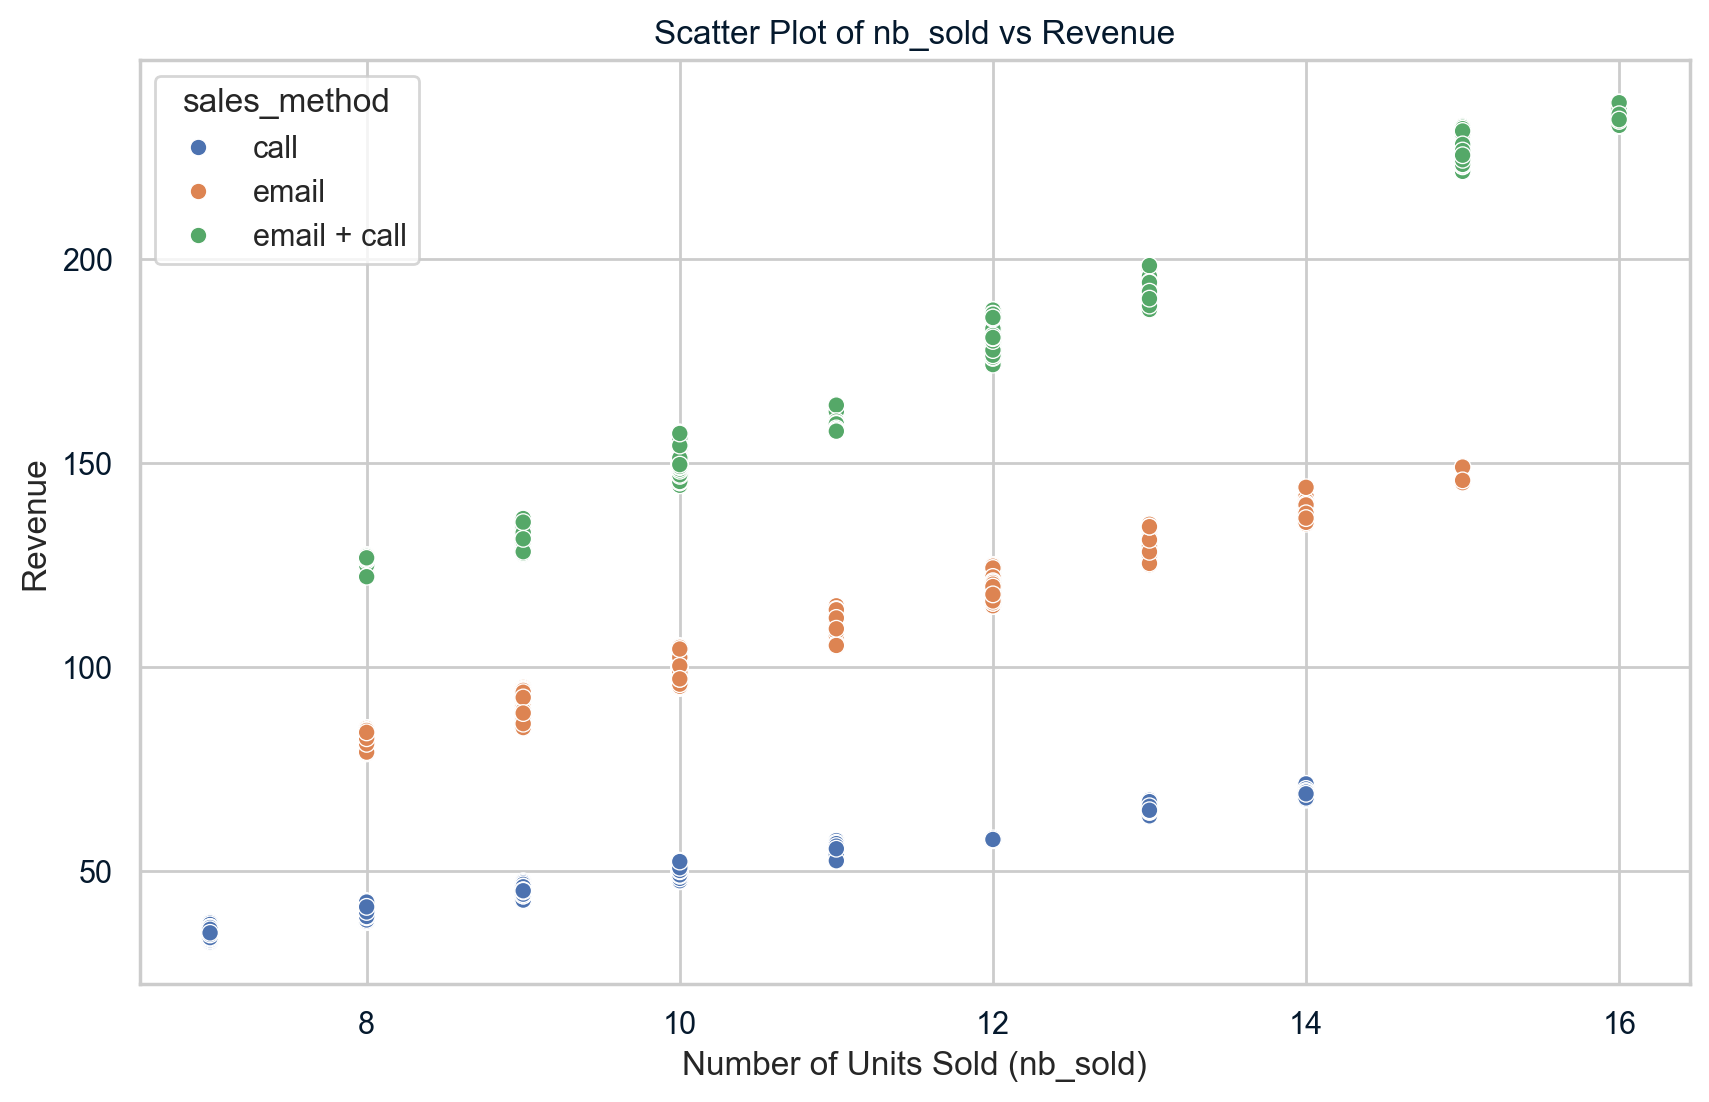

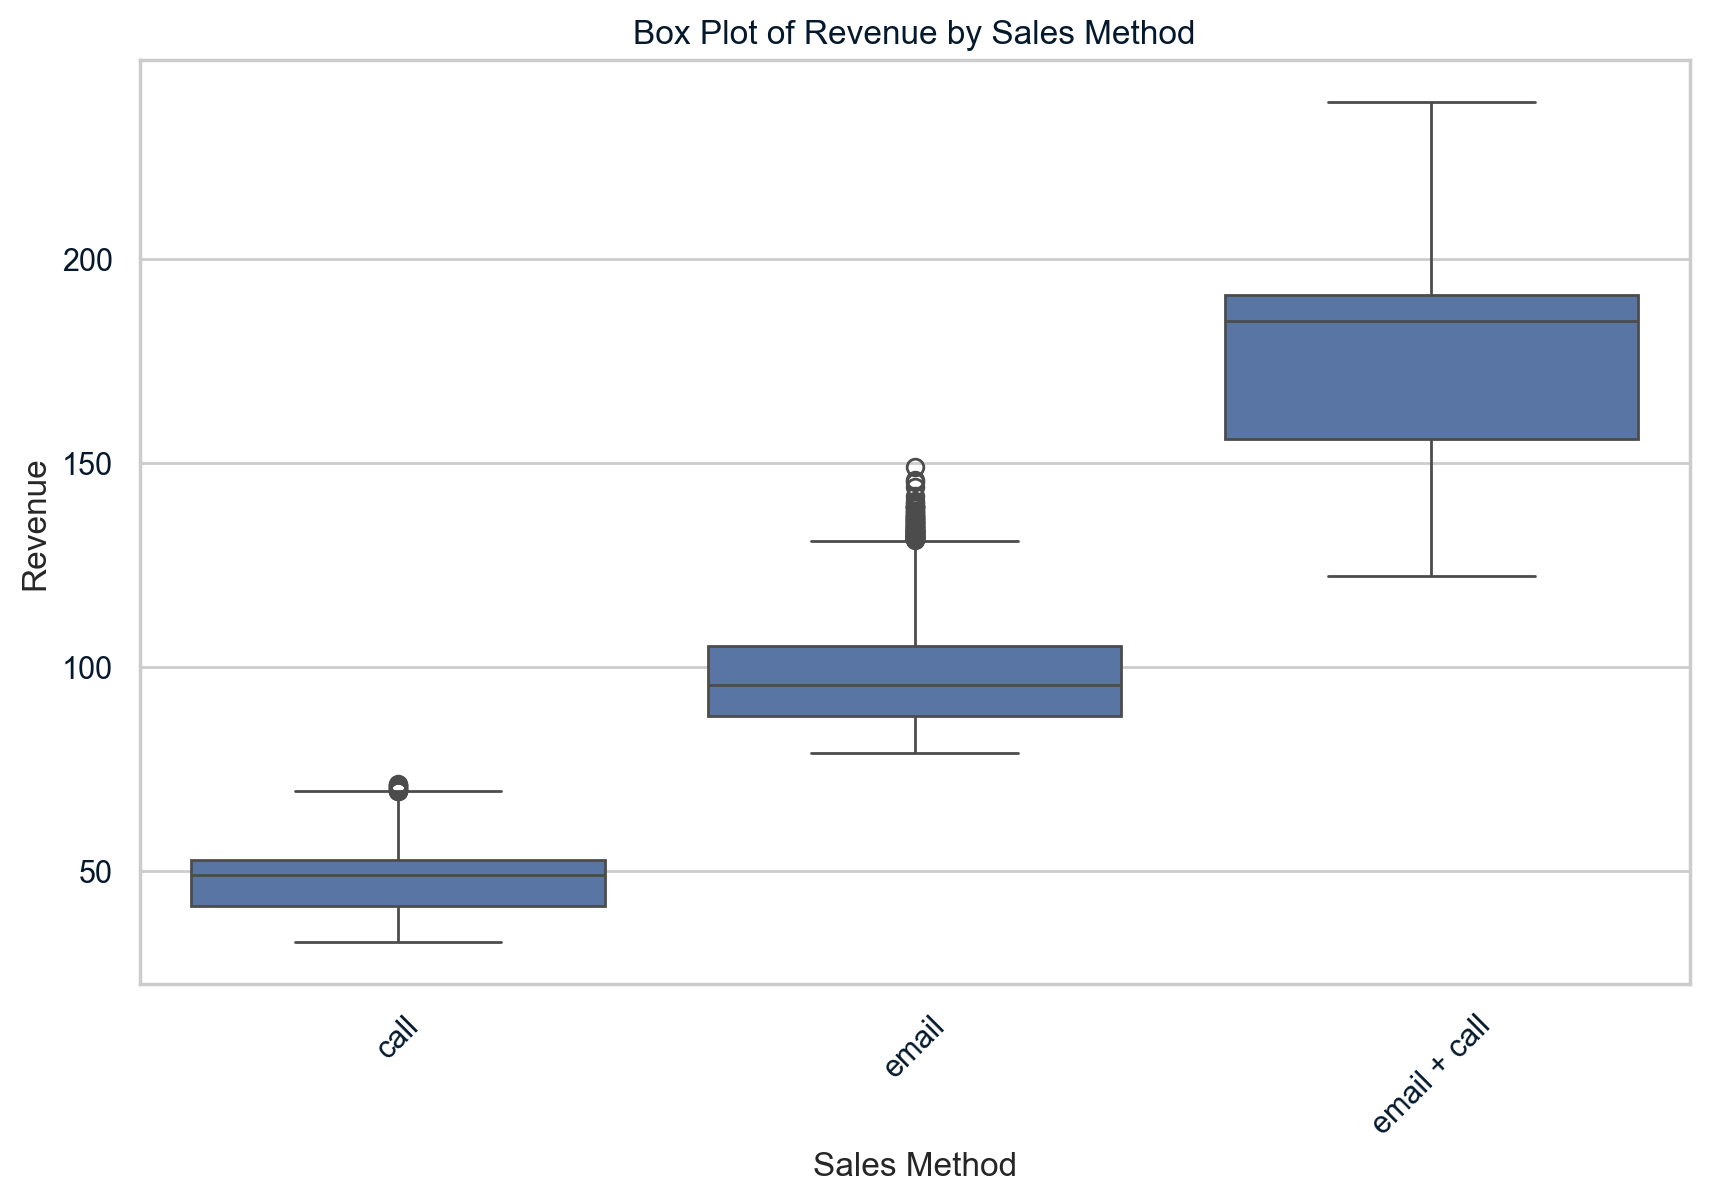

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.252e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:31:39   Log-Likelihood:                -46303.
No. Observations:               13926   AIC:                         9.272e+04
Df Residuals:                   13871   BIC:                         9.313e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [64]:
# 1. Correlation Analysis
correlation = df[['nb_sold', 'revenue','years_as_customer','nb_site_visits']].corr()
print("Correlation between nb_sold and revenue:")
print(correlation)

# 2. Visualization: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nb_sold', y='revenue', hue='sales_method', )
plt.title('Scatter Plot of nb_sold vs Revenue')
plt.xlabel('Number of Units Sold (nb_sold)')
plt.ylabel('Revenue')
plt.show()

# Visualization: Box plot for categorical analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.title('Box Plot of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# 3. Fit a Multiple Linear Regression Model
model = sm.formula.ols('revenue ~ nb_sold + C(sales_method) + years_as_customer + nb_site_visits + C(state)', data=df).fit()

# Display model summary
print(model.summary())

# 4. ANOVA table to evaluate the contribution of sales_method
anova_results = anova_lm(model, typ=2)  # Type II ANOVA
print("\nANOVA Results:")
print(anova_results)

## Results interpretation
**Visually**, there is a correlation between number of units solds and revenue, with the sales method also playing an important role.
Given the p-values it looks like only sales_method and nb_sold are significant in explaining revenue. Moving on to impute data based on these values. 

## Regression-based imputation

In [65]:
# Saving the null ids for analysis after imputation.
null_ids = df[df['revenue'].isnull()]['customer_id'] # For after comparison

In [66]:
# Step 1: One-hot encode the 'sales_method' column
df_encoded = pd.get_dummies(df, columns=['sales_method'], drop_first=True)

# Step 2: Create a training dataset without missing 'revenue'
train_df = df_encoded[df_encoded['revenue'].notnull()]

# Step 3: Fit the regression model
# Here, we include nb_sold and the encoded sales method variables
model = sm.OLS(train_df['revenue'], sm.add_constant(train_df[['nb_sold'] + [col for col in df_encoded.columns if 'sales_method_' in col]])).fit()

# Step 4: Predict missing revenue values
# Create a DataFrame of missing values to predict
missing_df = df_encoded[df_encoded['revenue'].isnull()]
predictions = model.predict(sm.add_constant(missing_df[['nb_sold'] + [col for col in df_encoded.columns if 'sales_method_' in col]]))

# Step 5: Fill the missing revenue values in the original DataFrame
df.loc[df['revenue'].isnull(), 'revenue'] = predictions

In [67]:
# Imputation revision
print(f"Null mean: {df[df['customer_id'].isin(null_ids)]['revenue'].mean()}")
print(f"Previous mean: {df[~df['customer_id'].isin(null_ids)]['revenue'].mean()}")
print(f"Combined mean: {df['revenue'].mean()}")

Null mean: 118.44333530334279
Previous mean: 93.93494255349705
Combined mean: 95.689743474386


Curious that the means are so different.
**Plotting** distributions to further understand.

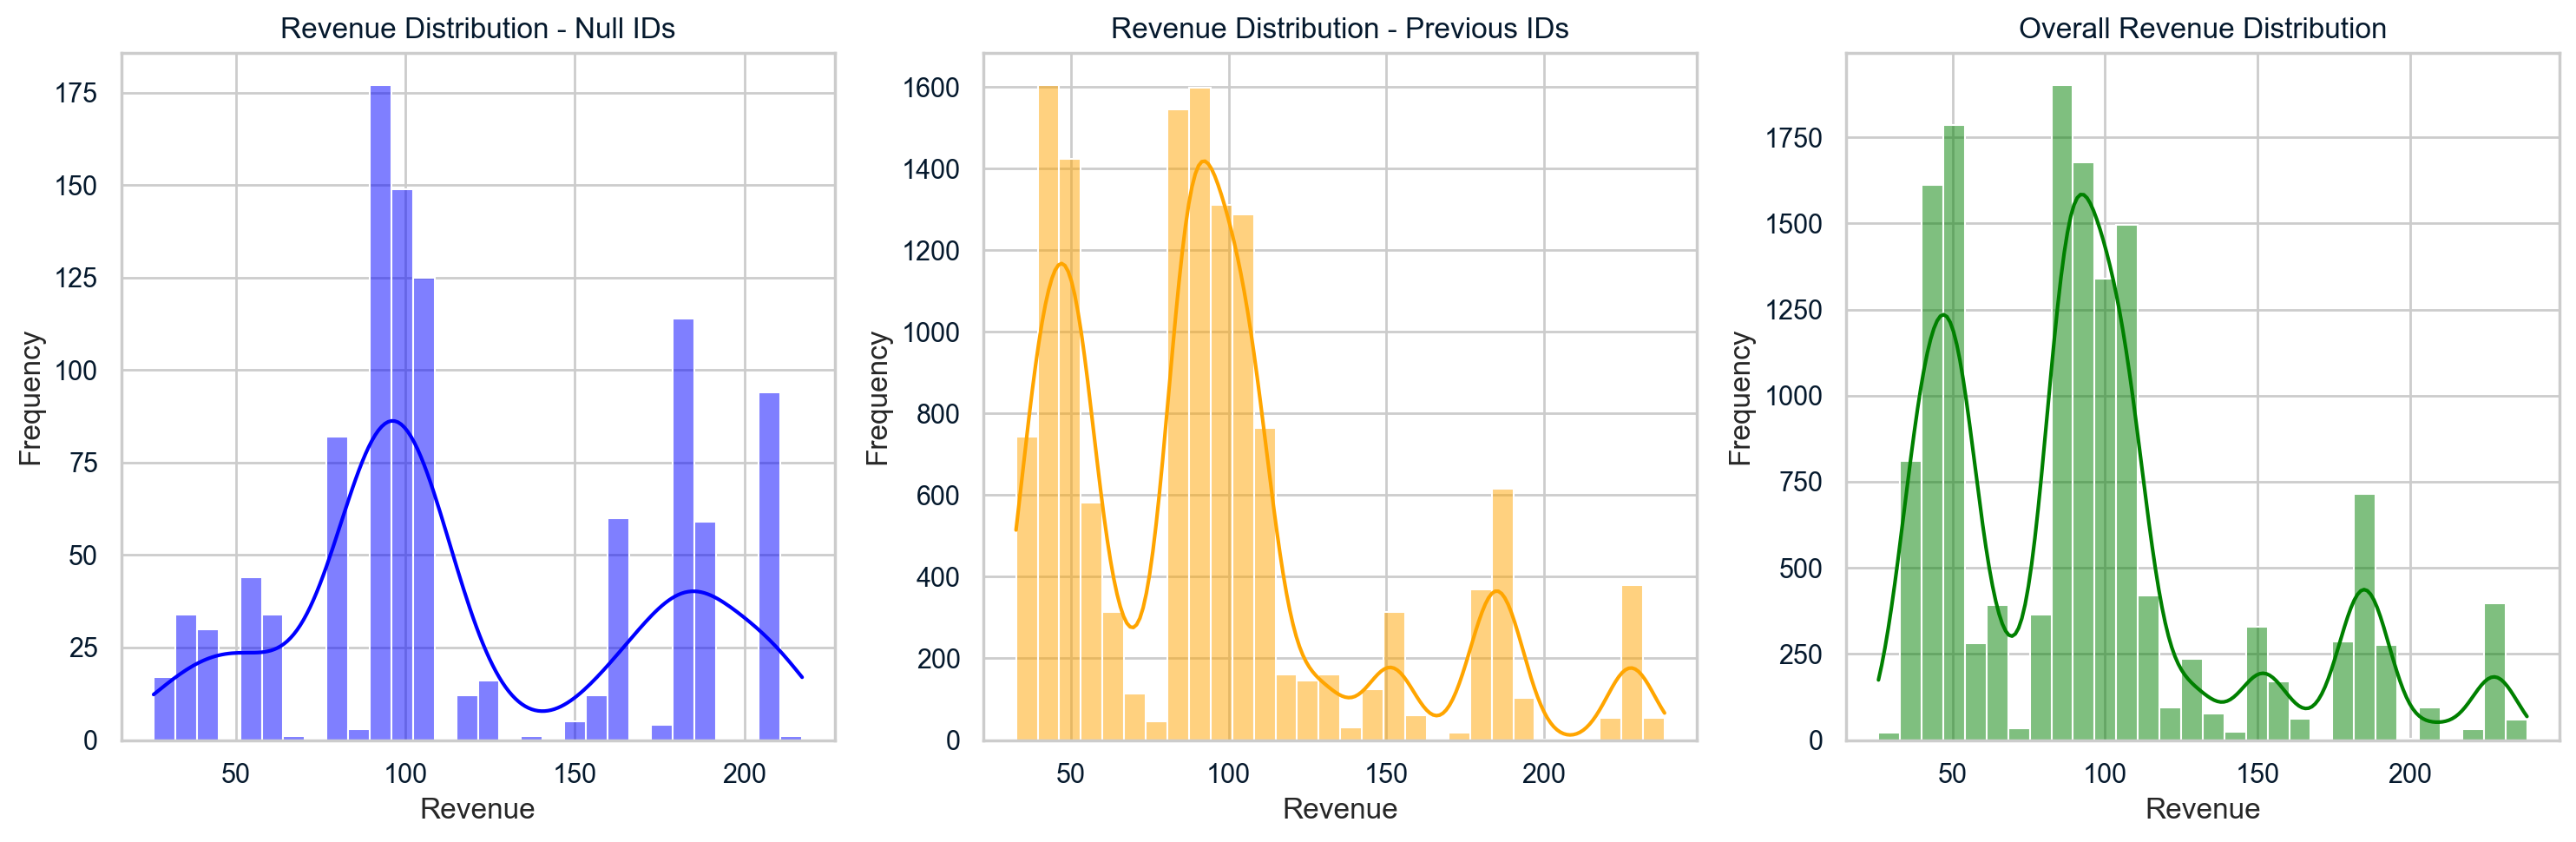

In [68]:
# Set up the figure with 3 subplots
plt.figure(figsize=(15, 5))

# Histogram for customers in null_ids
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.histplot(data=df[df['customer_id'].isin(null_ids)], x='revenue', bins=30, kde=True, color='blue')
plt.title('Revenue Distribution - Null IDs')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Histogram for customers not in null_ids
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.histplot(data=df[~df["customer_id"].isin(null_ids)], x='revenue', bins=30, kde=True, color='orange')
plt.title('Revenue Distribution - Previous IDs')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Histogram for overall revenue distribution
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.histplot(data=df, x='revenue', bins=30, kde=True, color='green')
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Why is the mean so high for the null values? 
Digging into the regression.

In [69]:
filtered_null_df = df[df['customer_id'].isin(null_ids)]

In [70]:
filtered_null_df.groupby('sales_method')['nb_sold'].count()

sales_method
call            181
email           544
email + call    349
Name: nb_sold, dtype: int64

In [71]:
filtered_null_df.groupby('sales_method')['nb_sold'].sum()

sales_method
call            1763
email           5336
email + call    4353
Name: nb_sold, dtype: int64

### Result interpretation
It makes sense that the mean of the imputated values is greater since the most common sales methods were the ones that brought more revenue as seen in earlier distributions.

## Years as customers consistency
Company was founded in 1984, that is 40 years have passed to reach 2024, that means customers with 40+ years of loyalty should be treated as outliers.

In [72]:
count = df[df['years_as_customer'] >= 40]
df = df[df['years_as_customer'] <= 40]
print(f'Found {len(count)} outliers that have been removed.')

Found 2 outliers that have been removed.


# Checkpoint 2

In [73]:
df.to_csv('checkpoint.csv')

### Exploring Duplicates

In [74]:
print(f'Duplciate count: {df.duplicated().sum()}')

Duplciate count: 0


# Answering questions 
On this section I set to answer the business's questoins one by one. 

In [75]:
df = pd.read_csv('checkpoint.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df['sales_method'] = df['sales_method'].astype('category')
df['state'] = df['state'].astype('category')
df.dtypes

week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

In [76]:
# Just checking to see if the file is the correct one, without any null values.
df.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

## **1. How many customers were there for each approach?** 

In [77]:
df.groupby('sales_method')['customer_id'].count().sort_values(ascending = False)

sales_method
email           7465
call            4961
email + call    2572
Name: customer_id, dtype: int64

- **Email**:  7466
- **Call**:  4962
- **Email + Call**:  2572

## 2. What does the spread of the revenue look like overall? And for each method?
**Overall:**

Summary statistics:
count    14998.000000
mean        95.692656
std         48.179931
min         25.711398
25%         52.760000
50%         90.700000
75%        108.302383
max        238.320000
Name: revenue, dtype: float64


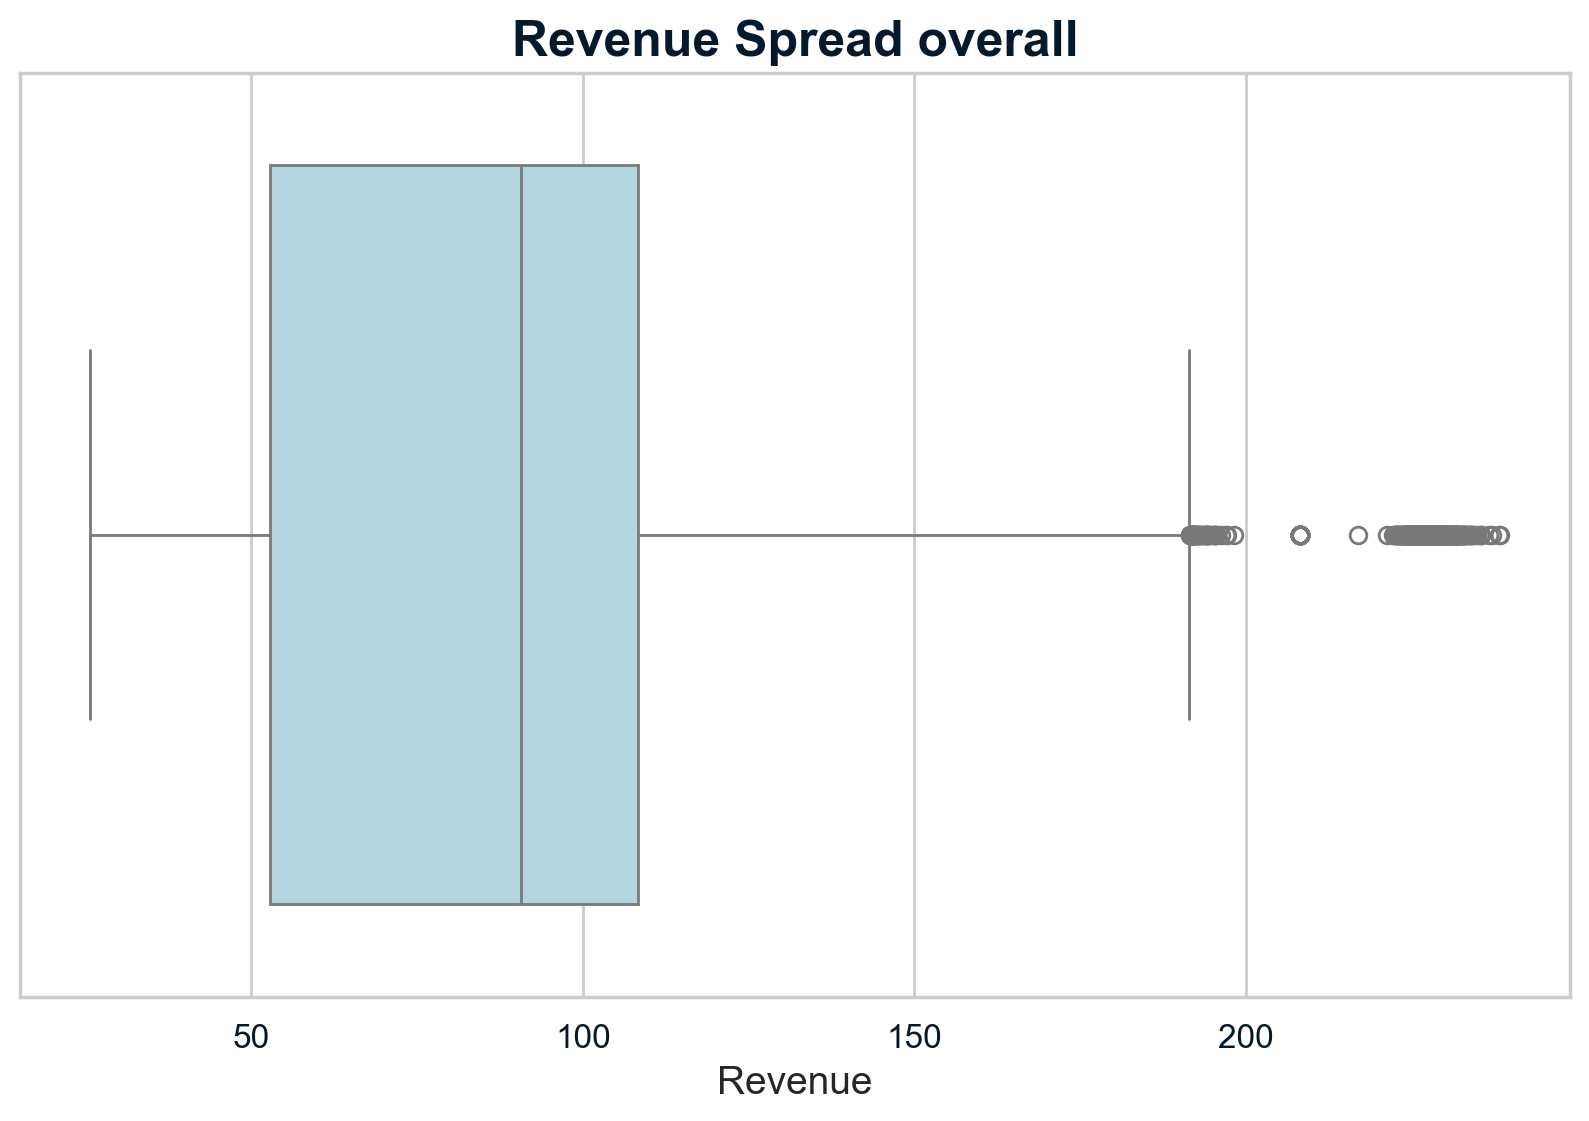

In [78]:
# Overall
print('Summary statistics:')
print(df['revenue'].describe())


plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'revenue', color = 'lightblue')
sns.set(style = 'whitegrid')
plt.xlabel('Revenue', fontsize = 14)
plt.title('Revenue Spread overall', fontsize = 18, weight = 'bold')
plt.xticks(fontsize = 12)
plt.savefig('revenue_spread.png')
plt.show()

**Per sales_method**

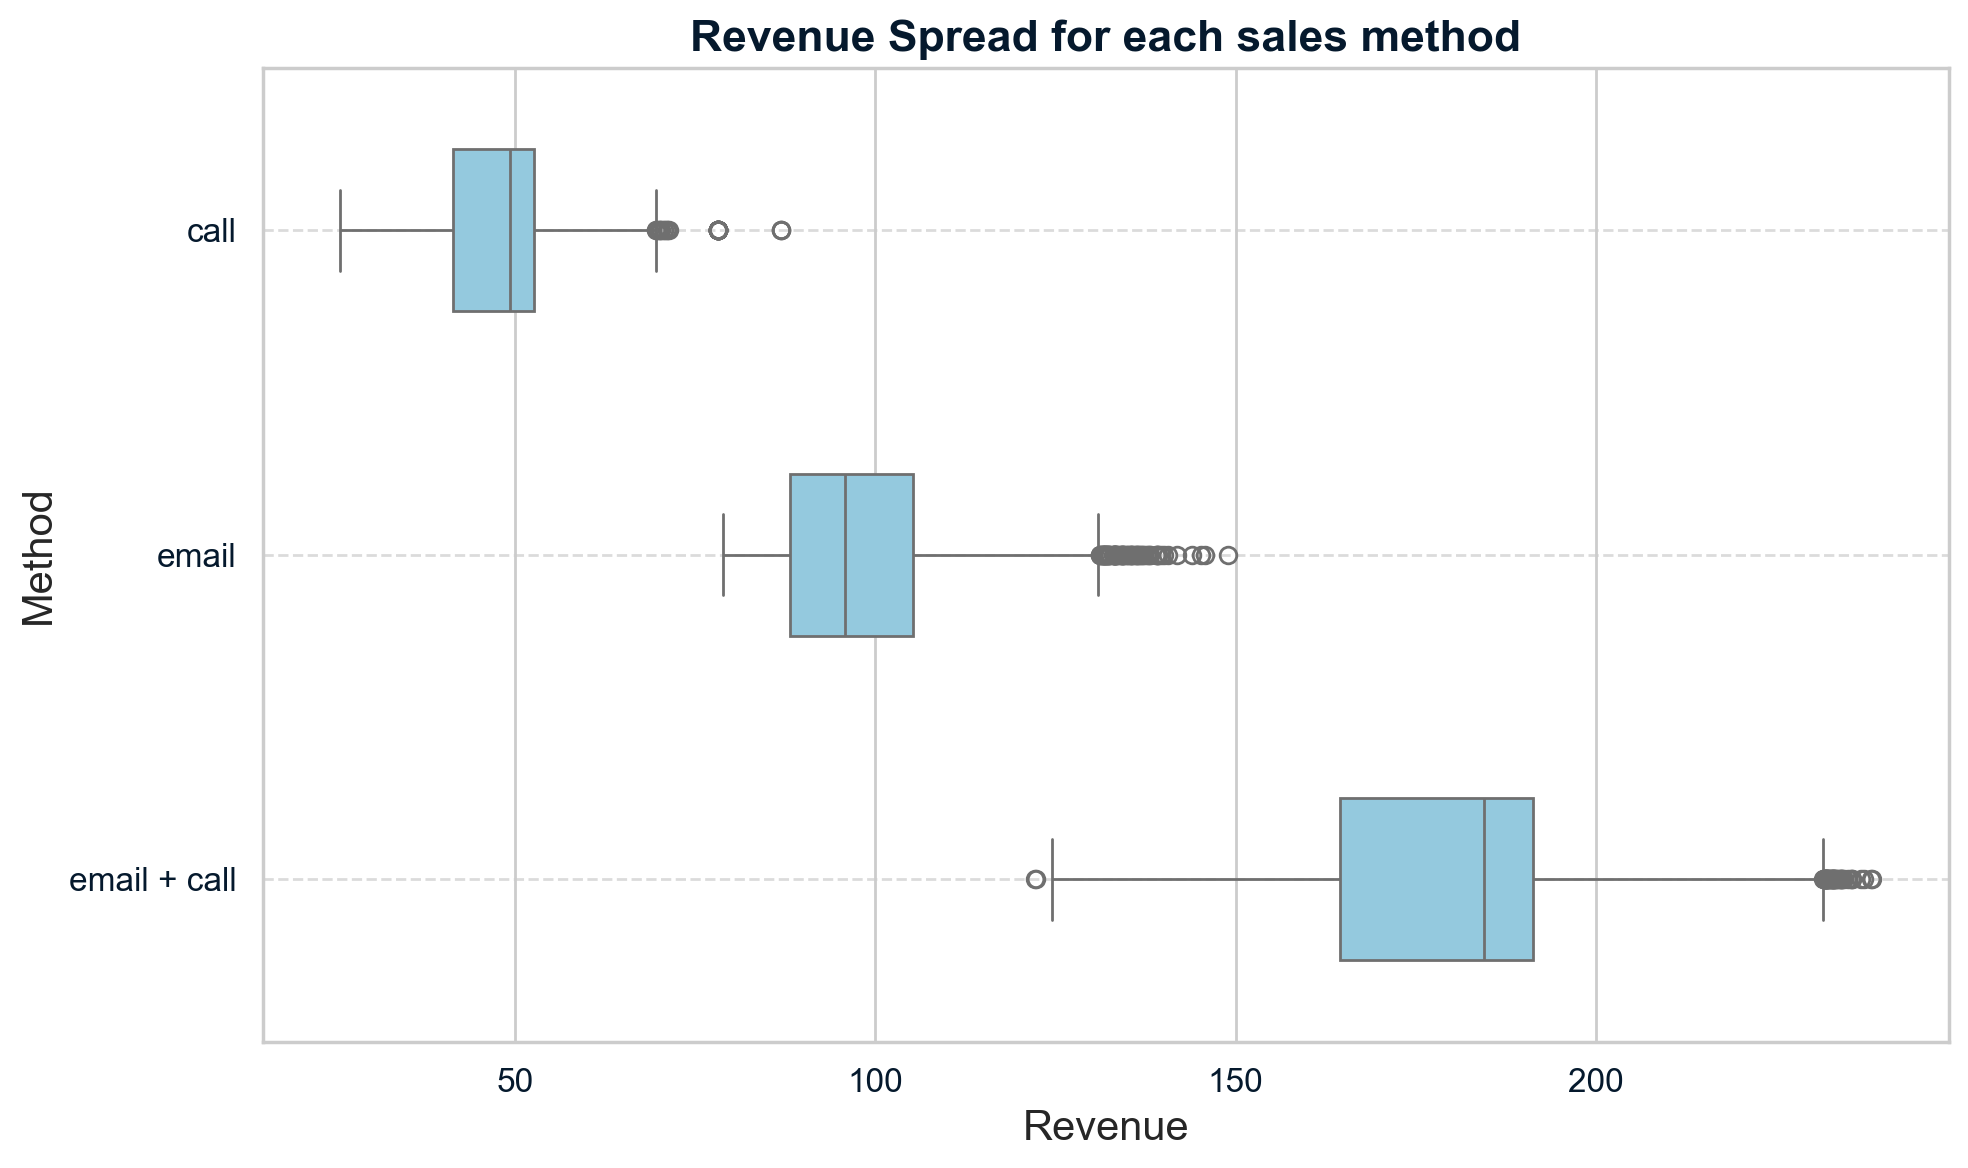

In [79]:
# Per method
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y = 'sales_method', x='revenue', color='skyblue', width=0.5)

plt.title("Revenue Spread for each sales method", fontsize=16, weight = 'bold') 
plt.xlabel("Revenue", fontsize=15)               
plt.ylabel("Method", fontsize=15)              
plt.yticks(fontsize = 12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12)  



plt.tight_layout()
plt.show()

In [80]:
df.groupby('sales_method')['revenue'].mean()

sales_method
call             47.673321
email            97.182367
email + call    183.990958
Name: revenue, dtype: float64

## **3. Was there any difference in revenue over time for each of the methods?**

In [81]:
df['sales_method'] = df['sales_method'].astype('category')
df['state'] = df['state'].astype('category')

**Testing visually**

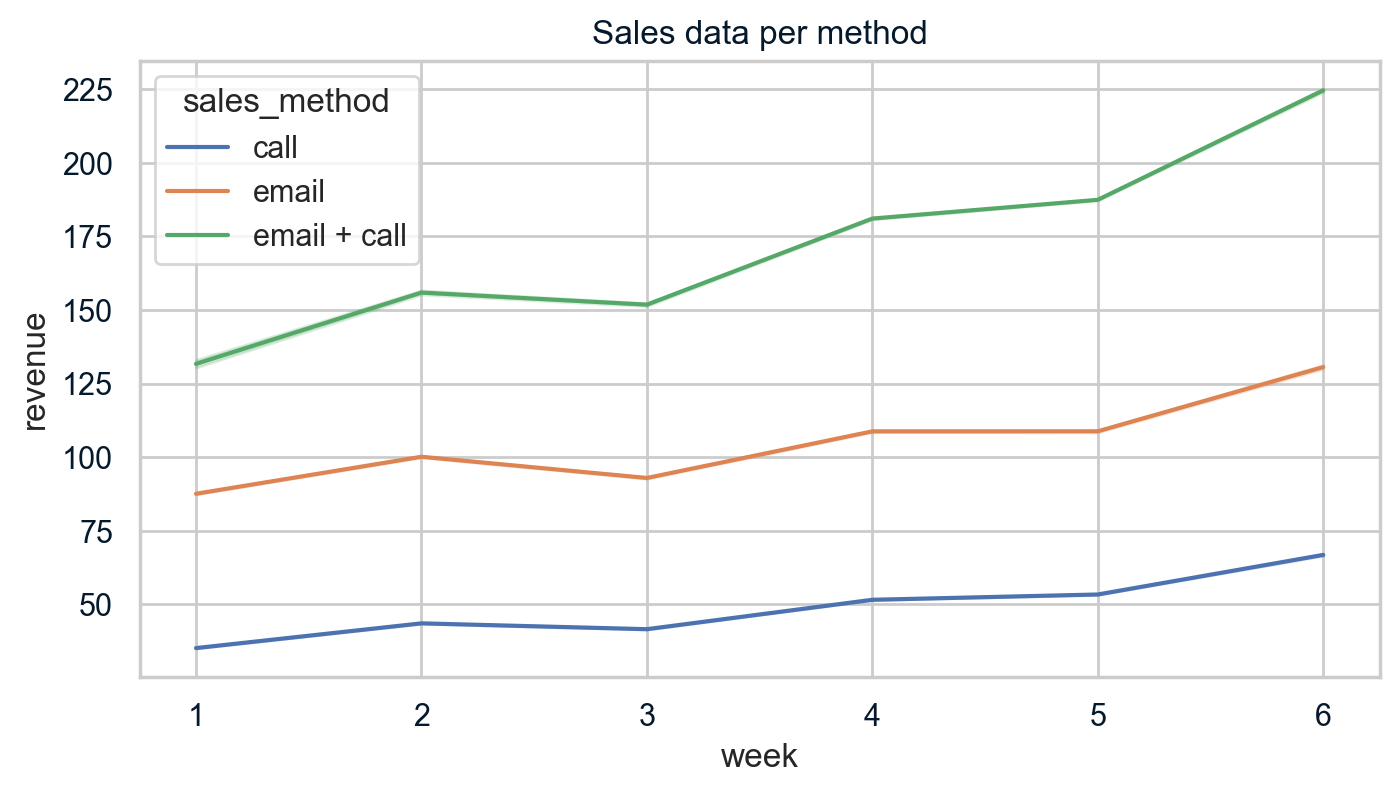

In [82]:
plt.figure(figsize=(8,4))
sns.lineplot(data = df, x = 'week', y = 'revenue', hue = 'sales_method')
plt.title('Sales data per method')
plt.show()

There seems to be difference visually, however it is important to understand if there is statistical significance.

### Test for normality and homogeneity of variances.
First we need to confirm how the data behaves, is it normal?

In [83]:
stat, p_value = stats.shapiro(df['revenue'])
print(f'Shapiro-Wilk Test p-value: {p_value}')

grouped_revenue = [df[df['sales_method'] == method]['revenue'] for method in df['sales_method'].unique()]
stat, p_value_levene = stats.levene(*grouped_revenue)

print(f'Levenes Test p-value: {p_value_levene}')

Shapiro-Wilk Test p-value: 0.0
Levenes Test p-value: 0.0


Data violates the assumption of normality and the variances are significantly different across teh groups (sales_methods) which indicate that another test (different from plain ANOVA) should be used.

## Kruskal-Wallis
Since the data violates all of ANOVA assumptions, I decided to go with Kruskal-Wallis test, because I don't want to further artificially alter the data (resample) to achieve desired results.

In [84]:
# Group revenue by sales method as before
grouped_revenue = [df[df['sales_method'] == method]['revenue'] for method in df['sales_method'].unique()]

# Perform the Kruskal-Wallis test
stat, p_value_kruskal = kruskal(*grouped_revenue)

print(f'Kruskal-Wallis Test p-value: {p_value_kruskal}')

Kruskal-Wallis Test p-value: 0.0


Kruskal-Wallis states that there is a significant difference between at least one of the groups, in order to understand which groups are different for which, a post-hoc pairwise comparison needs to be made. 

In [85]:
# Dunn's test for pairwise comparisons
dunn_test = sp.posthoc_dunn(df, val_col='revenue', group_col='sales_method', p_adjust='bonferroni')

print(dunn_test)


              call  email  email + call
call           1.0    0.0           0.0
email          0.0    1.0           0.0
email + call   0.0    0.0           1.0


### Result for question 3
All 3 sales_methods are different between themselves, proving that there is a statistical significant difference among all three sales methods.

## 4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar

In [86]:
summ = df.groupby('sales_method')['revenue'].agg(['sum','mean','median','count','std']).round(2)
summ.sort_values('sum', ascending=False)

,sum,mean,median,count,std
sales_method,,,,,
email,725466.37,97.18,95.79,7465,11.15
email + call,473224.75,183.99,184.50,2572,27.74
call,236507.34,47.67,49.26,4961,8.95


### Result for question 4

### Effort vs. Revenue: <br>
**Email (Low Effort, Moderate Revenue):** <br>
**Effort:** Very little work—just sending two emails over a three-week period. This is the most time-efficient method, requiring minimal human intervention.
**Revenue:** Mean revenue per customer: \$97.18. Total revenue: \$725,563.59.
**Conclusion:** This method is the most cost-effective and requires the least effort. It may be ideal if you are targeting a larger number of customers at scale while keeping team effort low. <br>
<br>
**Call (High Effort, Low Revenue):**<br>
**Effort:** Each customer receives a call lasting around 30 minutes. This is a significant time investment per customer.
**Revenue:** Mean revenue per customer: \$47.67. Total revenue: \$236,557.81.
**Conclusion:** Despite the high effort, the return on investment (ROI) in terms of revenue is the lowest. This method would likely be the least recommended unless there are other non-revenue-related factors (e.g., customer relationship building) that make it valuable. <br>

**Email and Call (Moderate Effort, High Revenue):** <br>
**Effort:** Customers are first sent an email, and a 10-minute call follows a week later. The email requires little work, while the follow-up call adds moderate effort.
**Revenue:** Mean revenue per customer: \$183.99. Total revenue: \$473,224.75.
**Conclusion:** This method combines moderate effort with the highest return per customer. While the effort is more than email-only, the revenue is significantly higher. 

### **Key Factors to Consider:** <br> <br>
**Time Efficiency:**
<br>
If the goal is to maximize revenue with minimal effort, the email-only method stands out because it brings in a reasonable amount of revenue with the least amount of team time and energy. <br>
**Revenue Maximization:** <br>
If the client is focused on maximizing revenue per customer, the email + call method is the best choice, as it brings in the highest revenue, even though it requires some additional effort. <br>
**Team Capacity:**<br>
If the sales team has limited capacity, and you need to prioritize efforts where the return is highest for each additional hour spent, the email + call method seems to strike a good balance between effort and revenue. <br>
**Scalability:** <br>
The email-only method is easily scalable because it requires very little time per customer, which makes it ideal for large-scale campaigns where automation can be used. <br>
### Recommended Strategy:
Given the moderate time investment and the significantly higher revenue, I would recommend focusing on the Email + Call method for higher-value customers or important leads where personalization and follow-up calls can make a difference. For the broader customer base where team resources are limited, the Email-only method provides a good trade-off between effort and revenue. <br> <br>
### Specific Recommendations:
**Email + Call:** Target high-value customers or segments with higher purchasing power, as this method has the highest revenue potential and adds a personal touch. <br>
**Email:** Use this method for larger audiences where the revenue per customer is lower, but the minimal effort and cost of outreach make it highly scalable.

## Chosen metric to monitor
**Average Revenue Per Customer**

In [87]:
# Group by sales_method and calculate total revenue and the number of unique customers
grouped = df.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    num_customers=('customer_id', 'nunique')
)

# Calculate ARPC by dividing total revenue by number of customers
grouped['ARPC'] = grouped['total_revenue'] / grouped['num_customers']

# Display the result
print(grouped)

              total_revenue  num_customers        ARPC
sales_method                                          
call          236507.344967           4961   47.673321
email         725466.372129           7465   97.182367
email + call  473224.745019           2572  183.990958


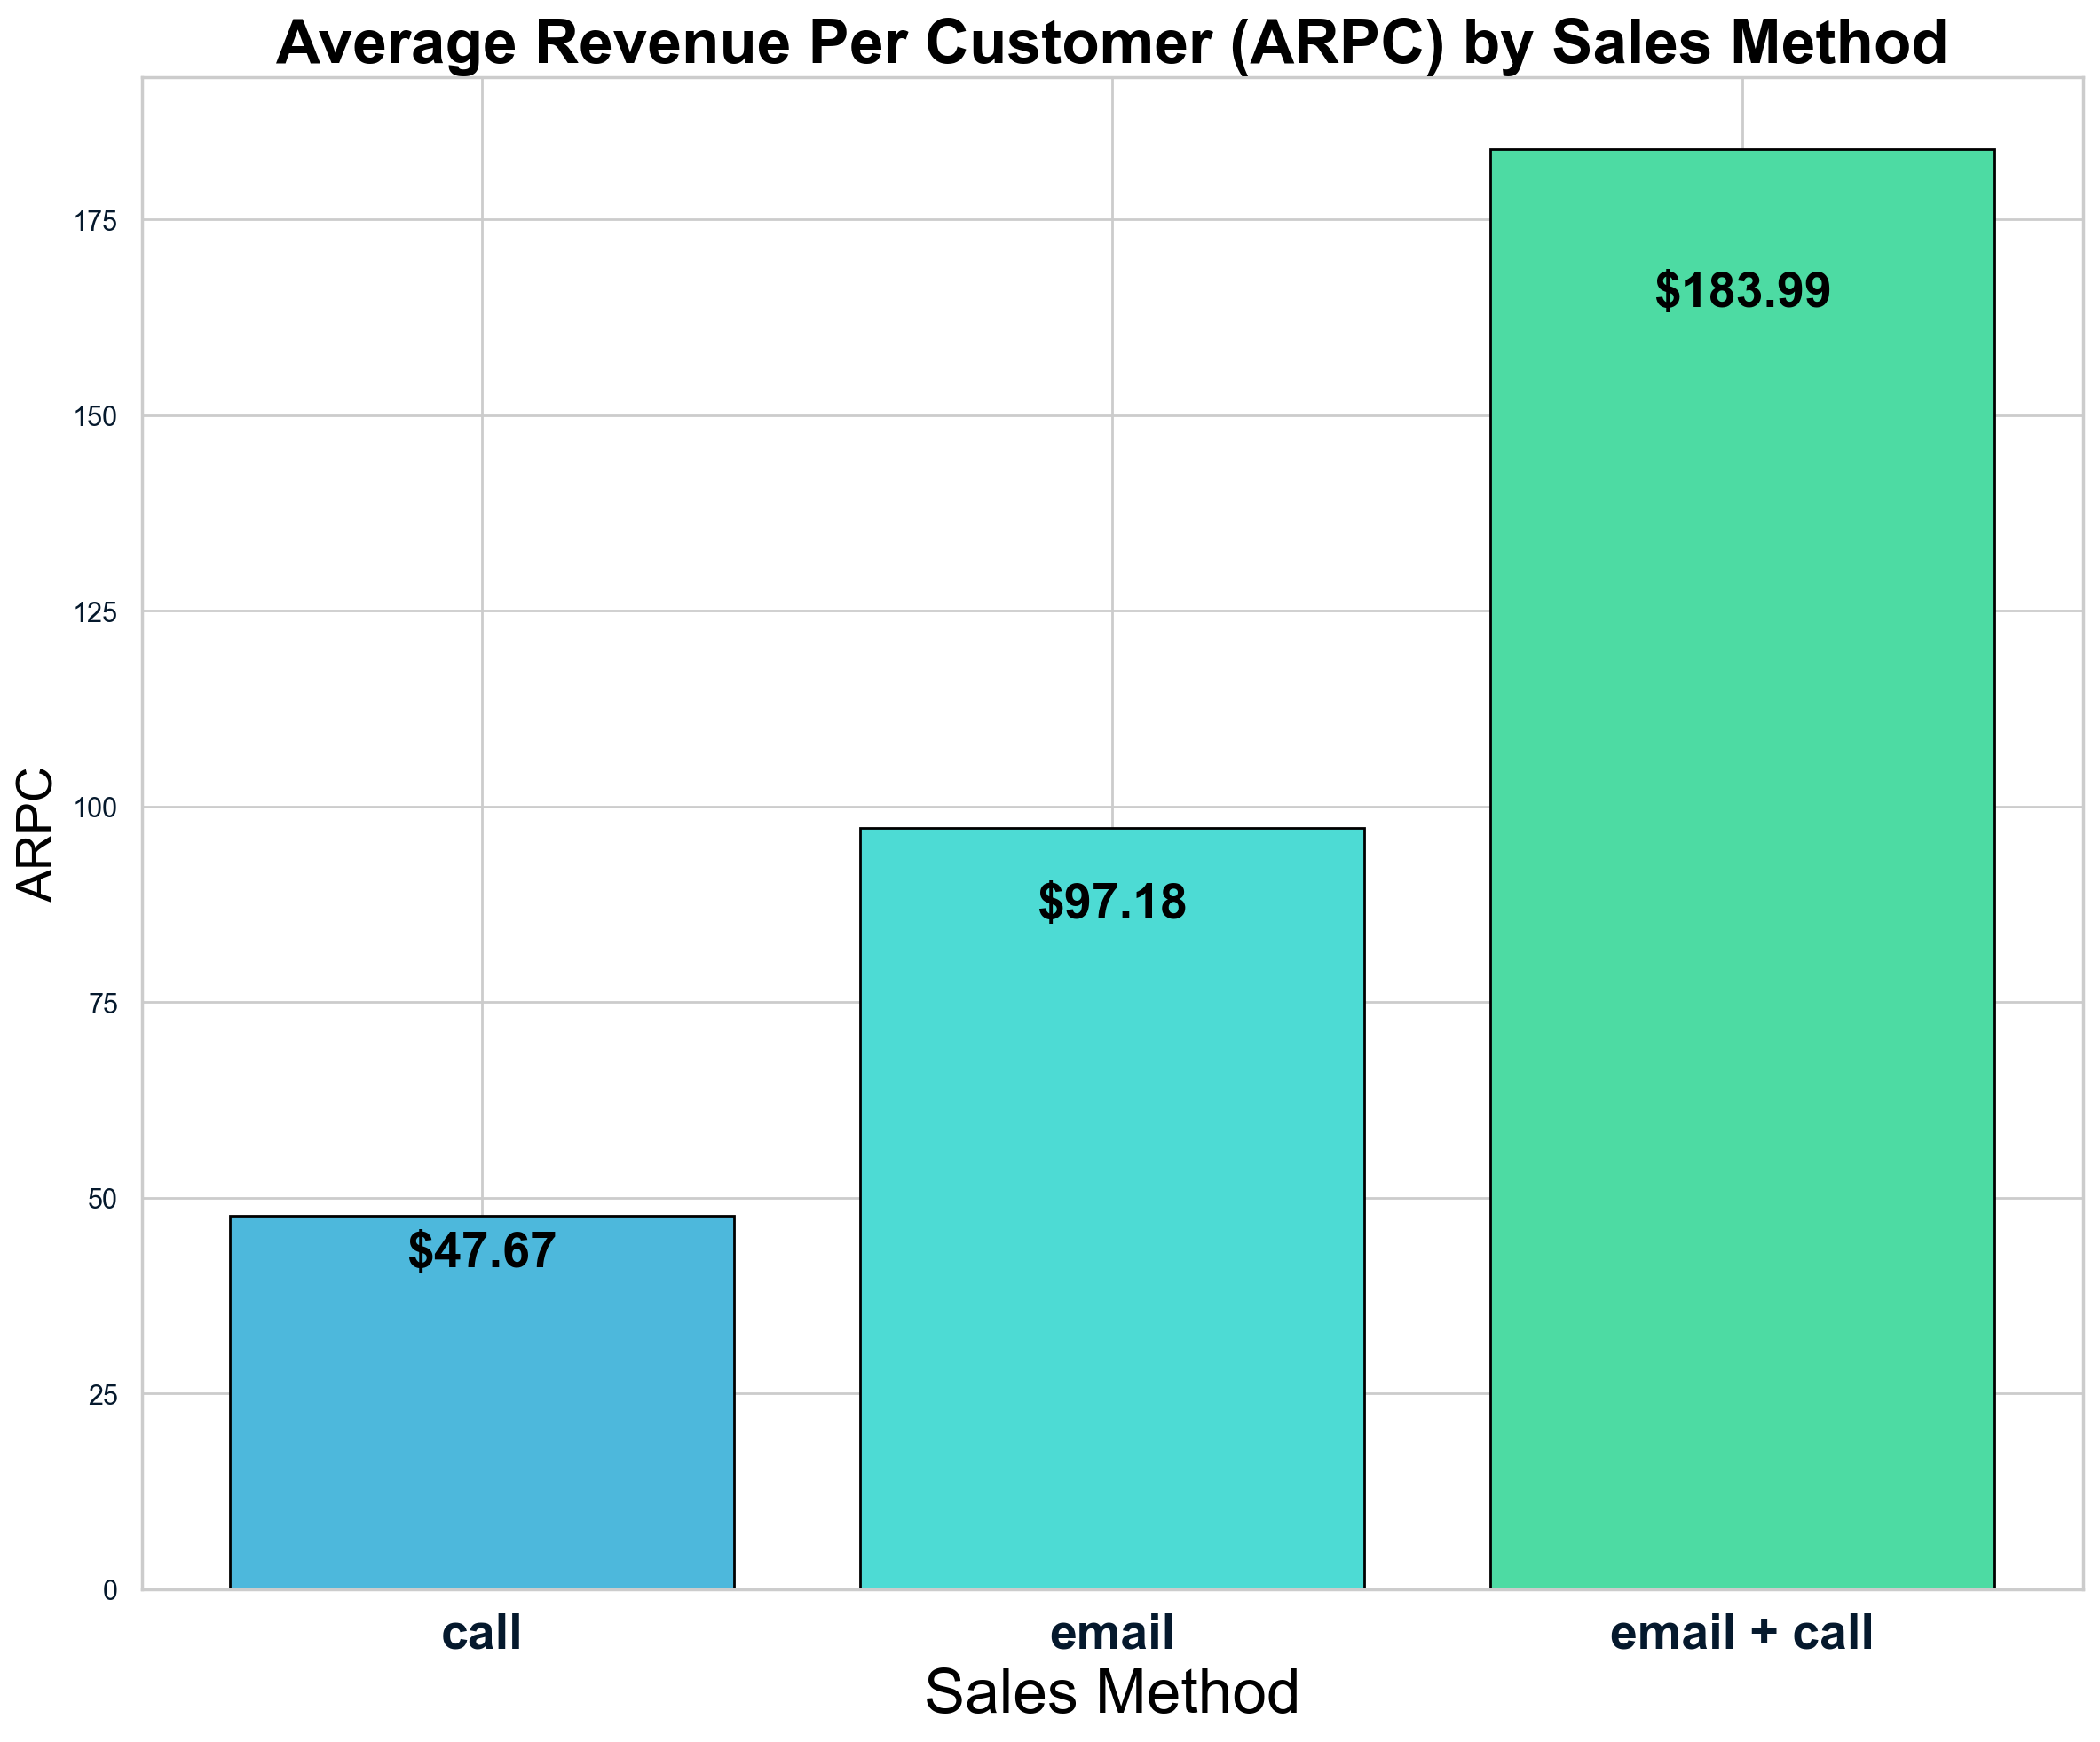

In [88]:
import matplotlib.pyplot as plt

# Colors for alternating bars
colors = ['#4DB8DC', '#4DDBD4', '#4DDBA3']

# Plotting with alternating colors for each bar
plt.figure(figsize=(12, 10))
plt.bar(grouped.index, grouped['ARPC'], color=colors, edgecolor='black')

# Adding titles and labels
plt.title('Average Revenue Per Customer (ARPC) by Sales Method', fontsize=25, weight='bold', color='black')
plt.ylabel('ARPC', fontsize=20, color='black')
plt.xlabel('Sales Method', fontsize=25, color='black')
plt.xticks(fontsize=20, weight = 'bold')

# Placing annotations inside the bars
for index, value in enumerate(grouped['ARPC']):
    plt.text(index, value * 0.9, f'${value:.2f}', va='center', ha='center', color='black', fontsize=20, weight = 'bold')

# Display the plot
plt.tight_layout()
plt.savefig('arpc_sales_method.png')
plt.show()


## Why ARPC?
- **Actionable:** It allows the business to compare different sales methods directly and make informed decisions on how to allocate resources. 
- **Scalable:** This metric can be applied to future campaigns and help the business track changes in performance over time. 
- **Clear:** It offers an easily interpretable financial performance indicator that sales teams can understand and act upon. 

## Extra context: <br>
"*We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.*"

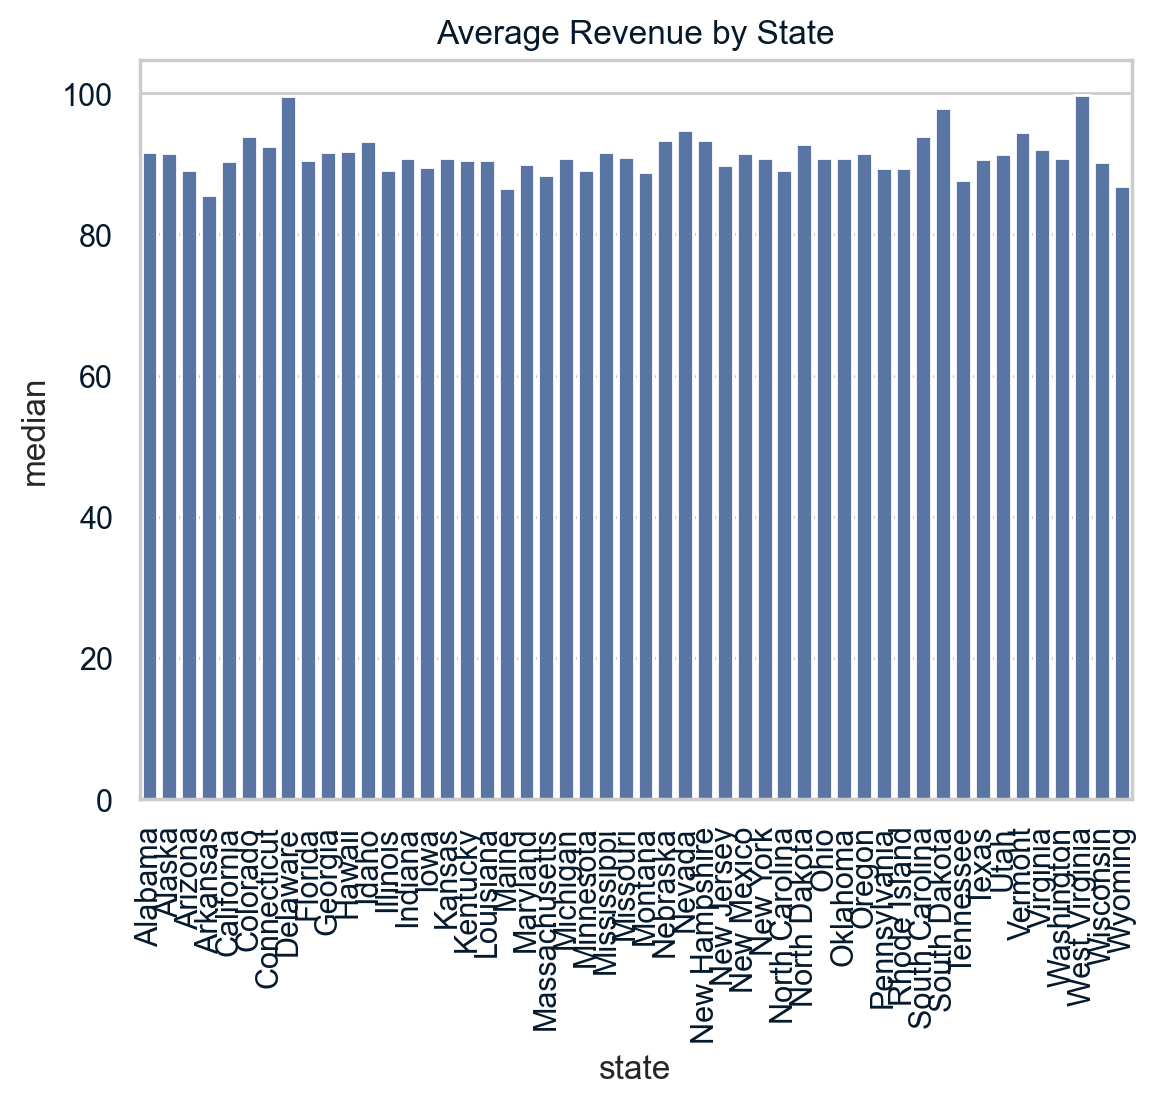

In [89]:
state_revenue = df.groupby('state')['revenue'].agg(['mean', 'median', 'std']).reset_index()

# Bar plot: Average Revenue per State
sns.barplot(x='state', y='median', data=state_revenue)
plt.title('Average Revenue by State')
plt.xticks(rotation=90)
plt.show()

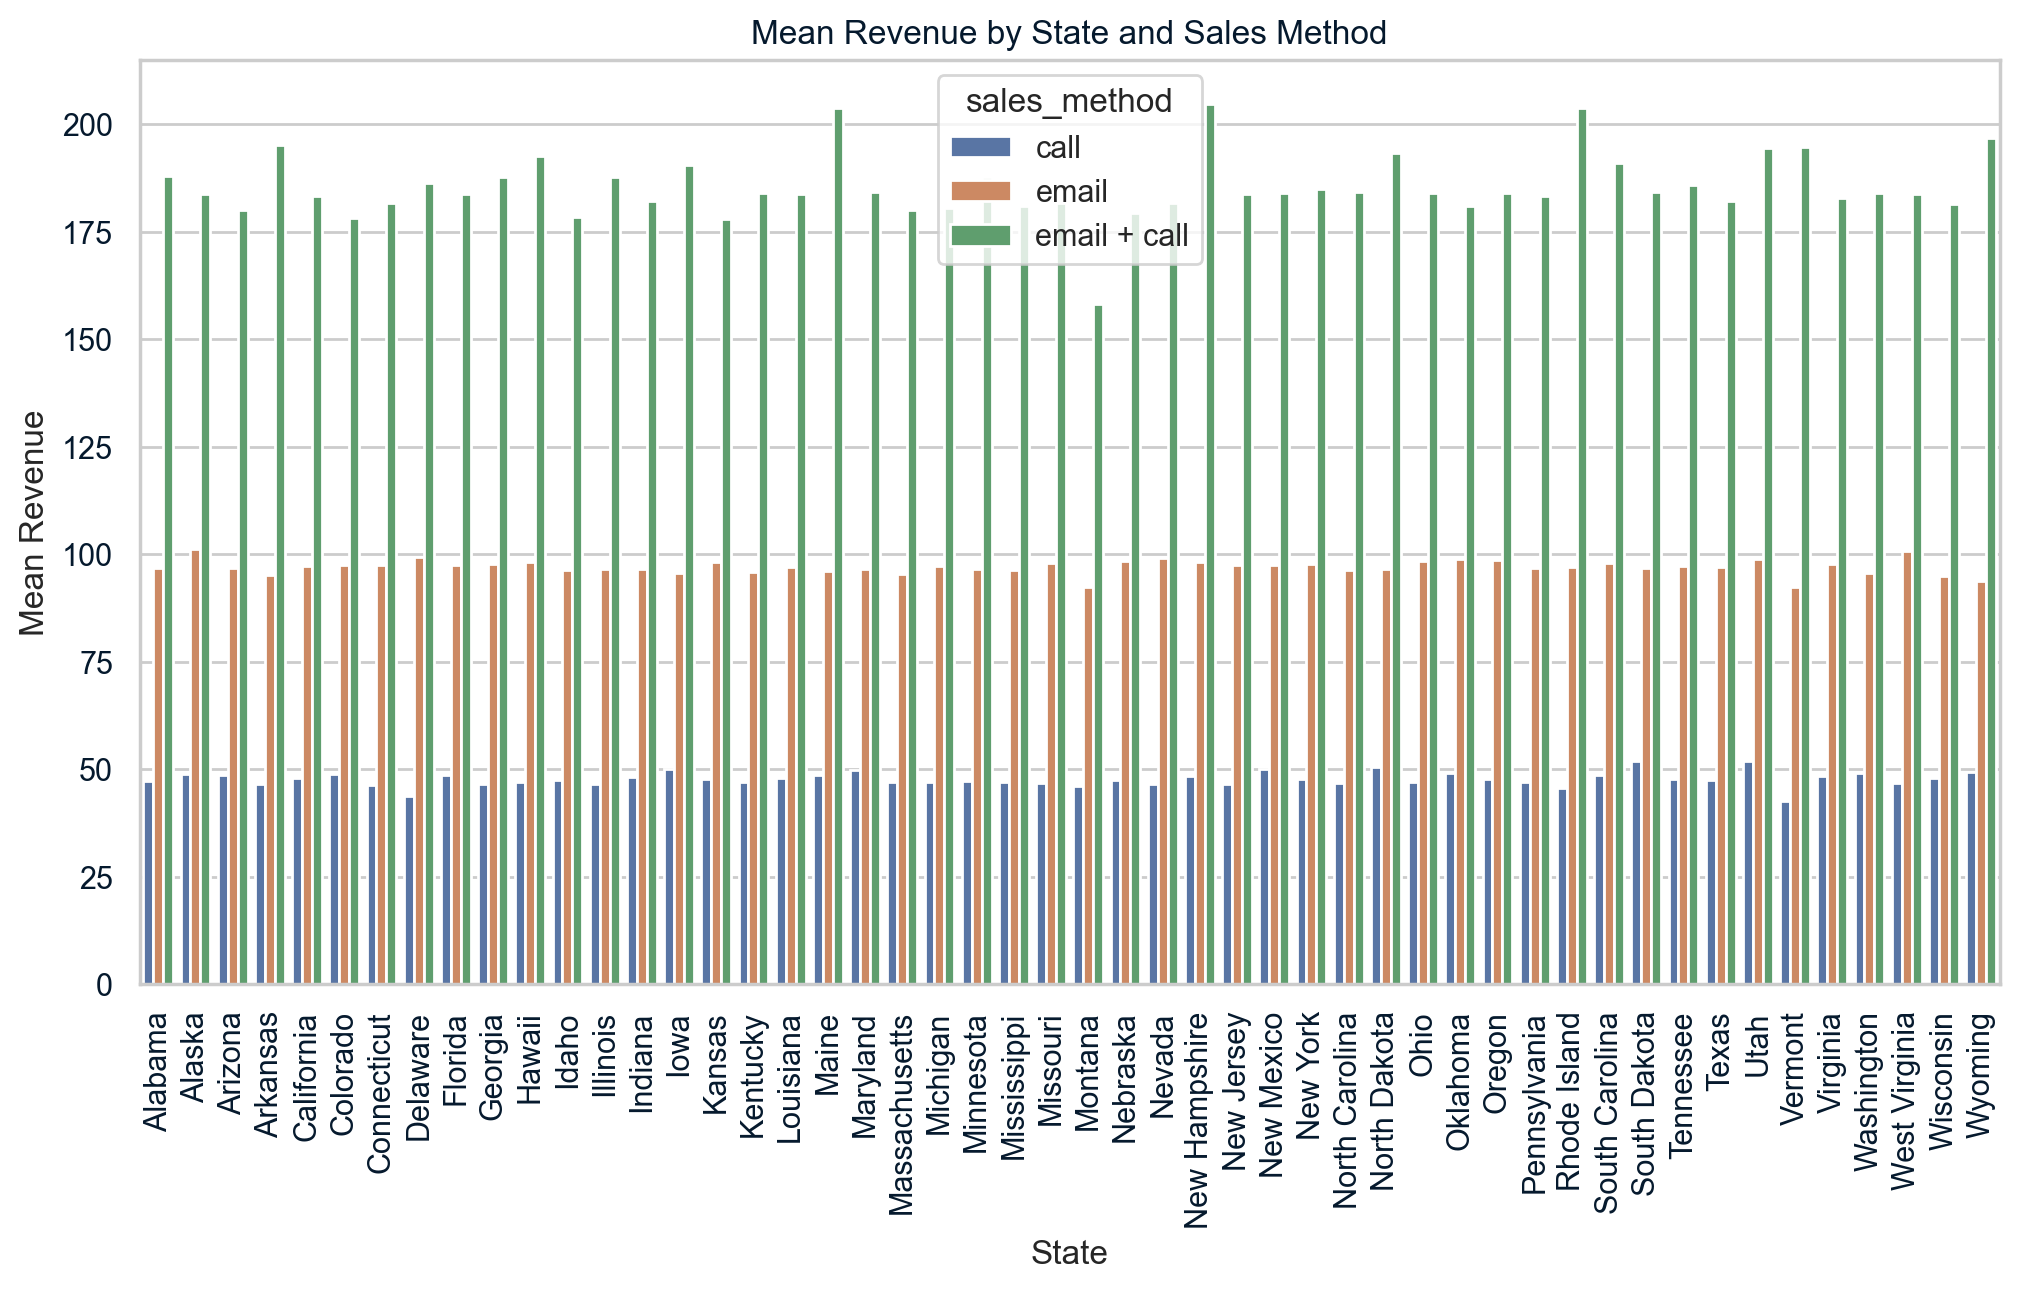

In [90]:
state_revenue_method = df.groupby(['state','sales_method'])['revenue'].agg(['mean', 'median', 'std']).reset_index()

# Plot for mean revenue
plt.figure(figsize=(12,6))
sns.barplot(data=state_revenue_method, x='state', y='mean', hue='sales_method')
plt.title('Mean Revenue by State and Sales Method')
plt.ylabel('Mean Revenue')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.show()


Looks like a uniform distribution, that means there is no real difference between the states and sales methods. 
<br> Testing statistically.

In [91]:
from scipy import stats

# Check if revenue differs significantly by state
states = df['state'].unique()
revenue_by_state = [df[df['state'] == state]['revenue'] for state in states]
f_stat, p_value = stats.f_oneway(*revenue_by_state)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 0.8486458864605322, p-value: 0.7647150698116681


p_value > 0.05, fail to reject the null hypothesis.
<br> There is no relation to the state from where the product was purchased.

### Exploring years as customer
Visualizing median revenue across years as customer:

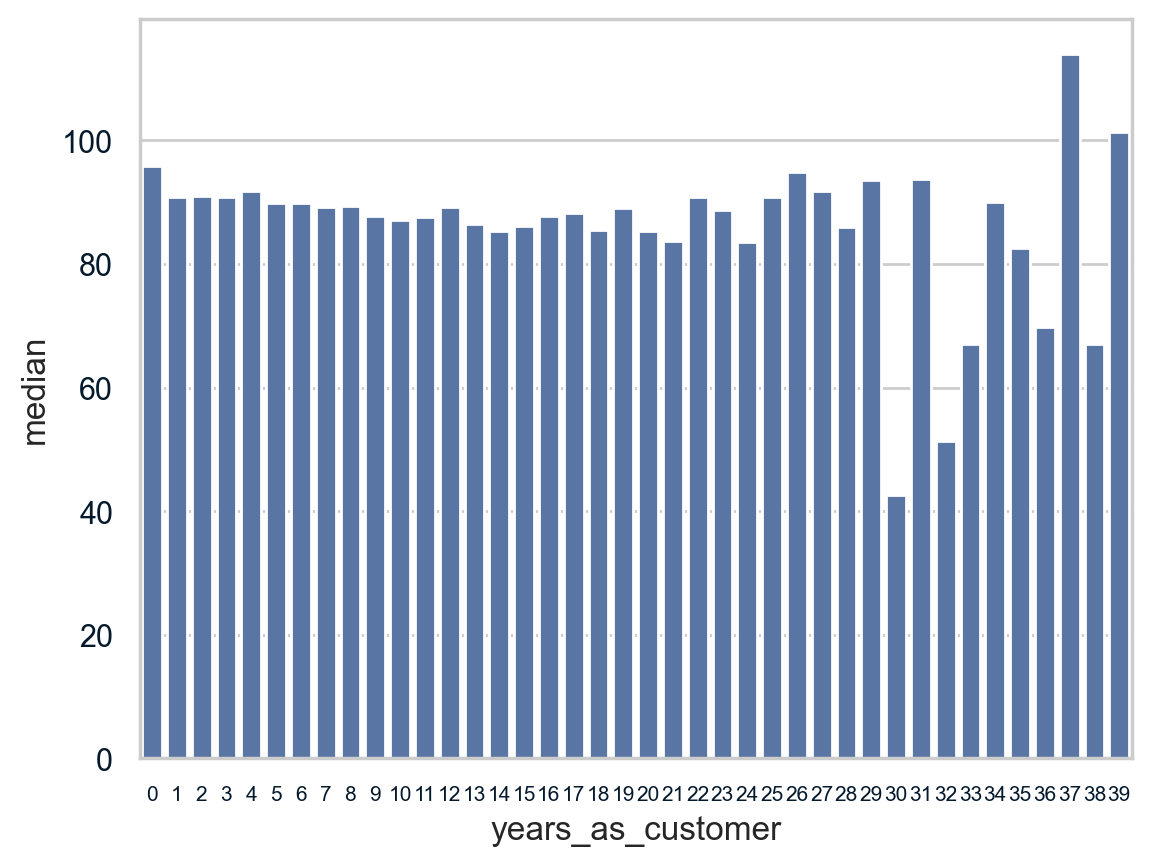

In [92]:
years_grouped = df.groupby('years_as_customer')['revenue'].agg(['mean','median','std']).reset_index()
sns.barplot(data = years_grouped, x = 'years_as_customer', y = 'median')
plt.xticks(fontsize = 7.5)
plt.show()

In [93]:
under_30 = years_grouped[years_grouped['years_as_customer'] < 30]
over_30 = years_grouped[years_grouped['years_as_customer'] >= 30]
print(f'Before 30 yac std: {under_30["median"].std()}')
print(f'After 30 yac std: {over_30["median"].std()}')

Before 30 yac std: 3.029667372085506
After 30 yac std: 22.421360902964782


What is going on after 30 years of being a customer?

In [94]:
# Calculate descriptive statistics for both groups
before_30_stats = df[df['years_as_customer'] < 30]['revenue'].describe()
after_30_stats = df[df['years_as_customer'] >= 30]['revenue'].describe()

print("Descriptive Statistics for Customers with less than 30 years:")
print(before_30_stats)
print("\nDescriptive Statistics for Customers with 30 years or more:")
print(after_30_stats)

Descriptive Statistics for Customers with less than 30 years:
count    14946.000000
mean        95.748708
std         48.212247
min         25.711398
25%         52.760000
50%         90.715000
75%        108.302383
max        238.320000
Name: revenue, dtype: float64

Descriptive Statistics for Customers with 30 years or more:
count     52.000000
mean      79.582262
std       34.474096
min       33.120000
25%       42.645000
50%       85.515000
75%       96.942500
max      182.017530
Name: revenue, dtype: float64


Understanding distributions

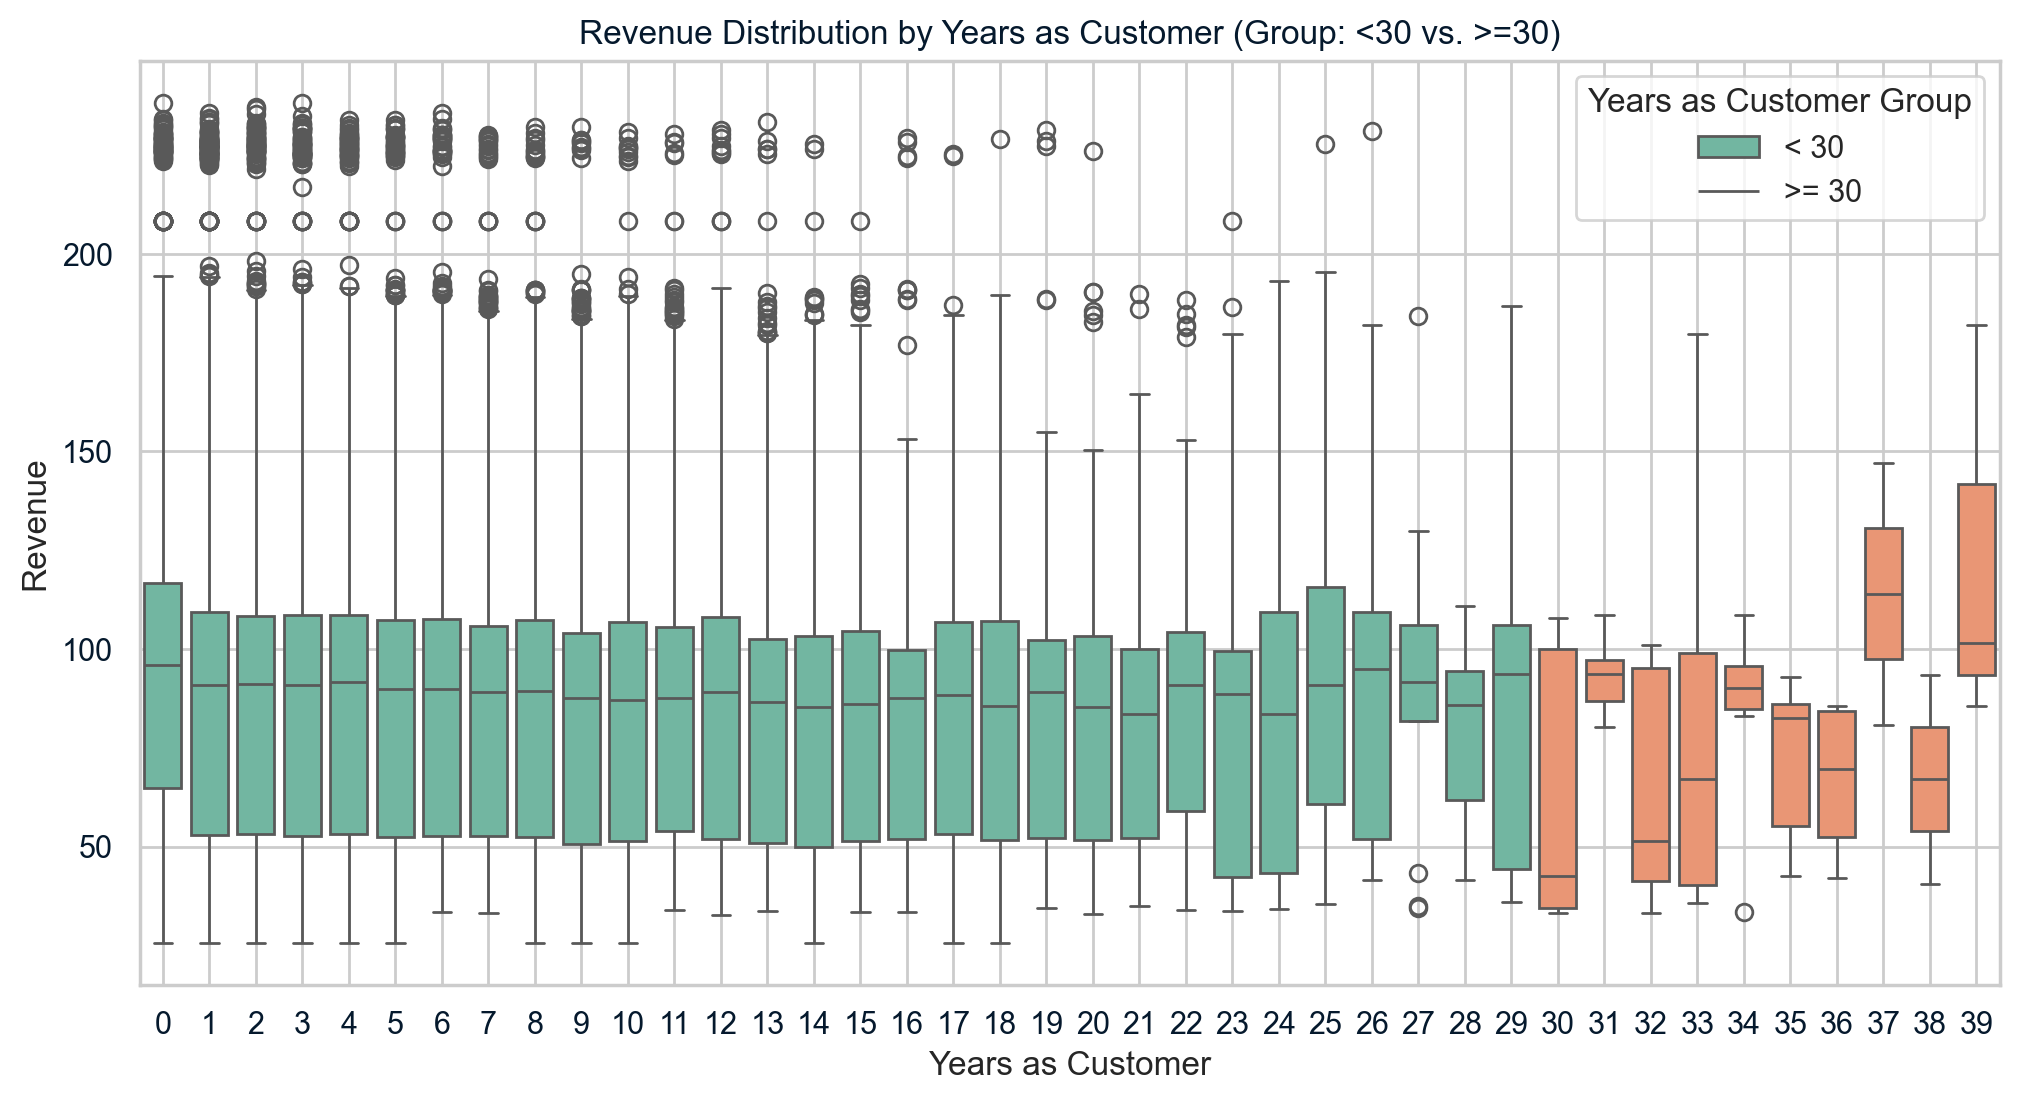

In [95]:
# Create box plots to visualize the revenue distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='years_as_customer', y='revenue', hue=(df['years_as_customer'] >= 30).astype(str), palette='Set2')
plt.title('Revenue Distribution by Years as Customer (Group: <30 vs. >=30)')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.legend(title='Years as Customer Group', labels=['< 30', '>= 30'])
plt.grid(True)
plt.show()

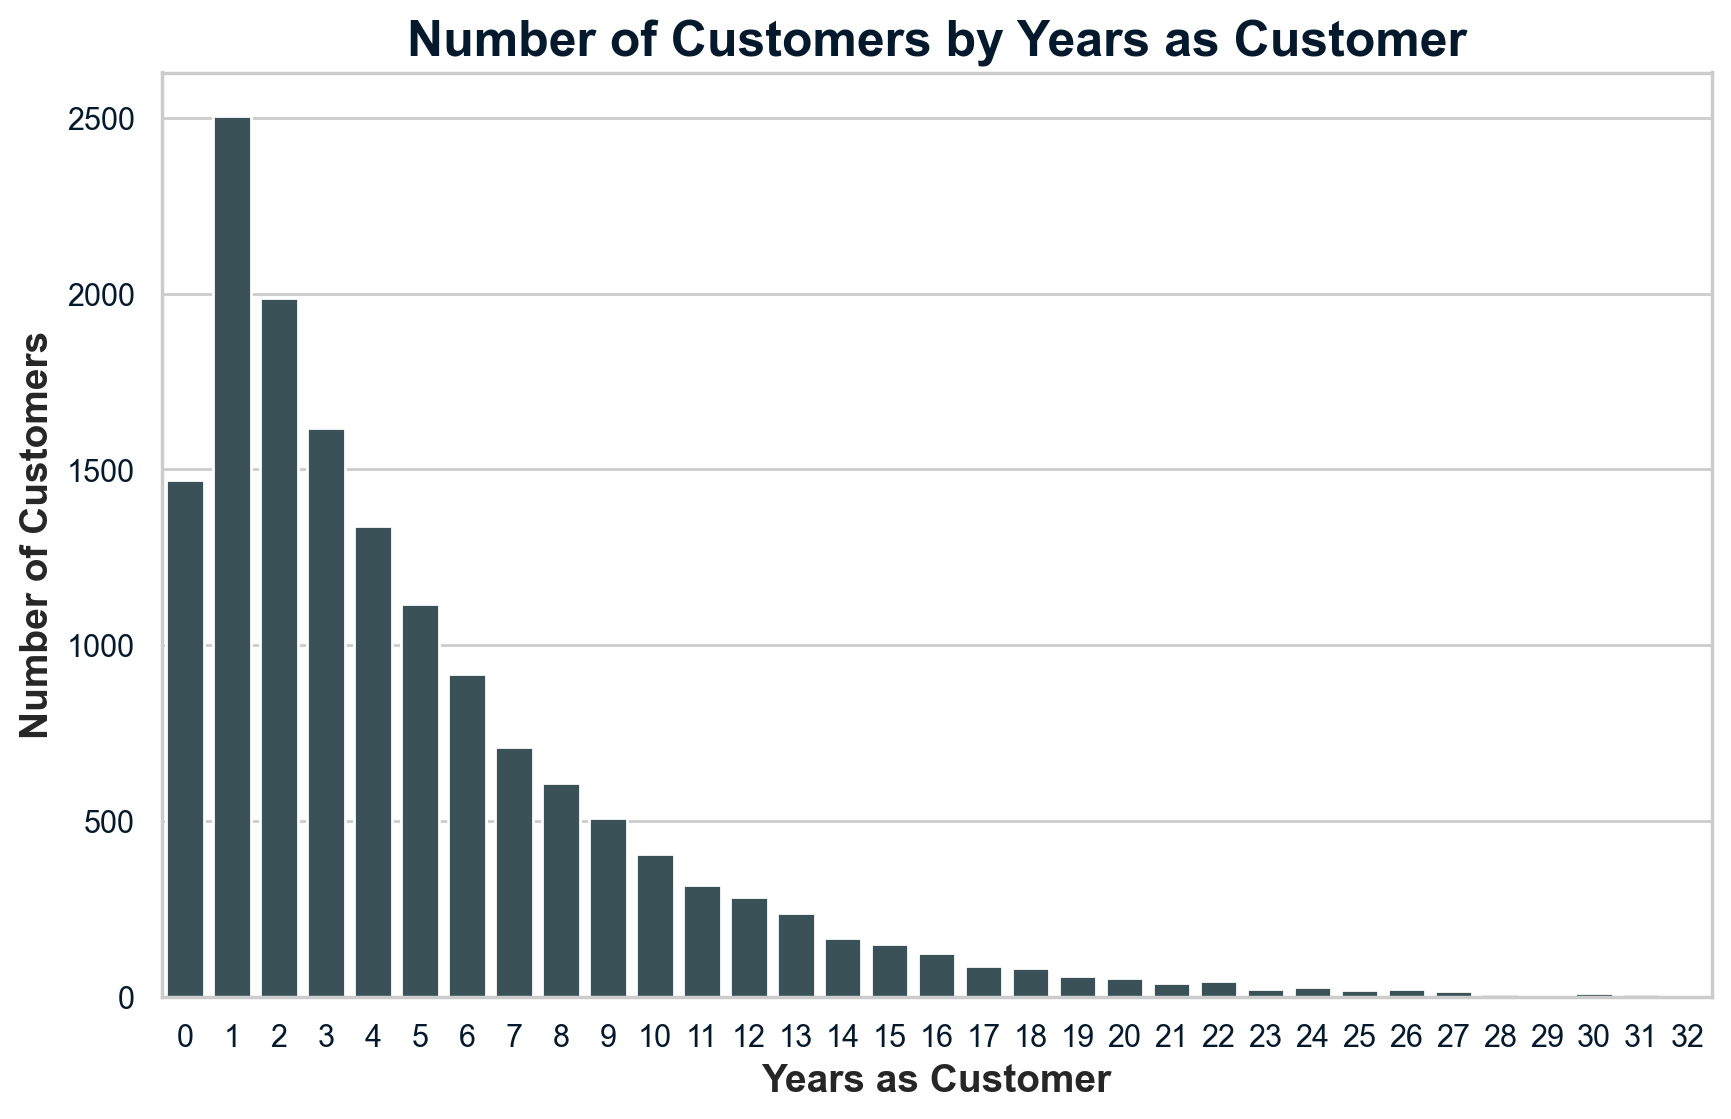

In [96]:

count = df.groupby('years_as_customer')['customer_id'].count().reset_index()
median_rev = df.groupby('years_as_customer')['revenue'].median().reset_index()
count_filtered = count[count['years_as_customer'] <= 32]
median_rev_filtered = median_rev[median_rev['years_as_customer'] <= 32]

plt.figure(figsize=(10, 6))
sns.barplot(data=count_filtered, x='years_as_customer', y='customer_id', color='#35555C')
# Add legend

# Set labels and title
plt.xlabel('Years as Customer', fontsize = 14, weight = 'bold')
plt.ylabel('Number of Customers', fontsize = 14, weight = 'bold')
plt.title('Number of Customers by Years as Customer', fontsize = 18, weight = 'bold')
plt.xticks(fontsize = 11)
plt.show()

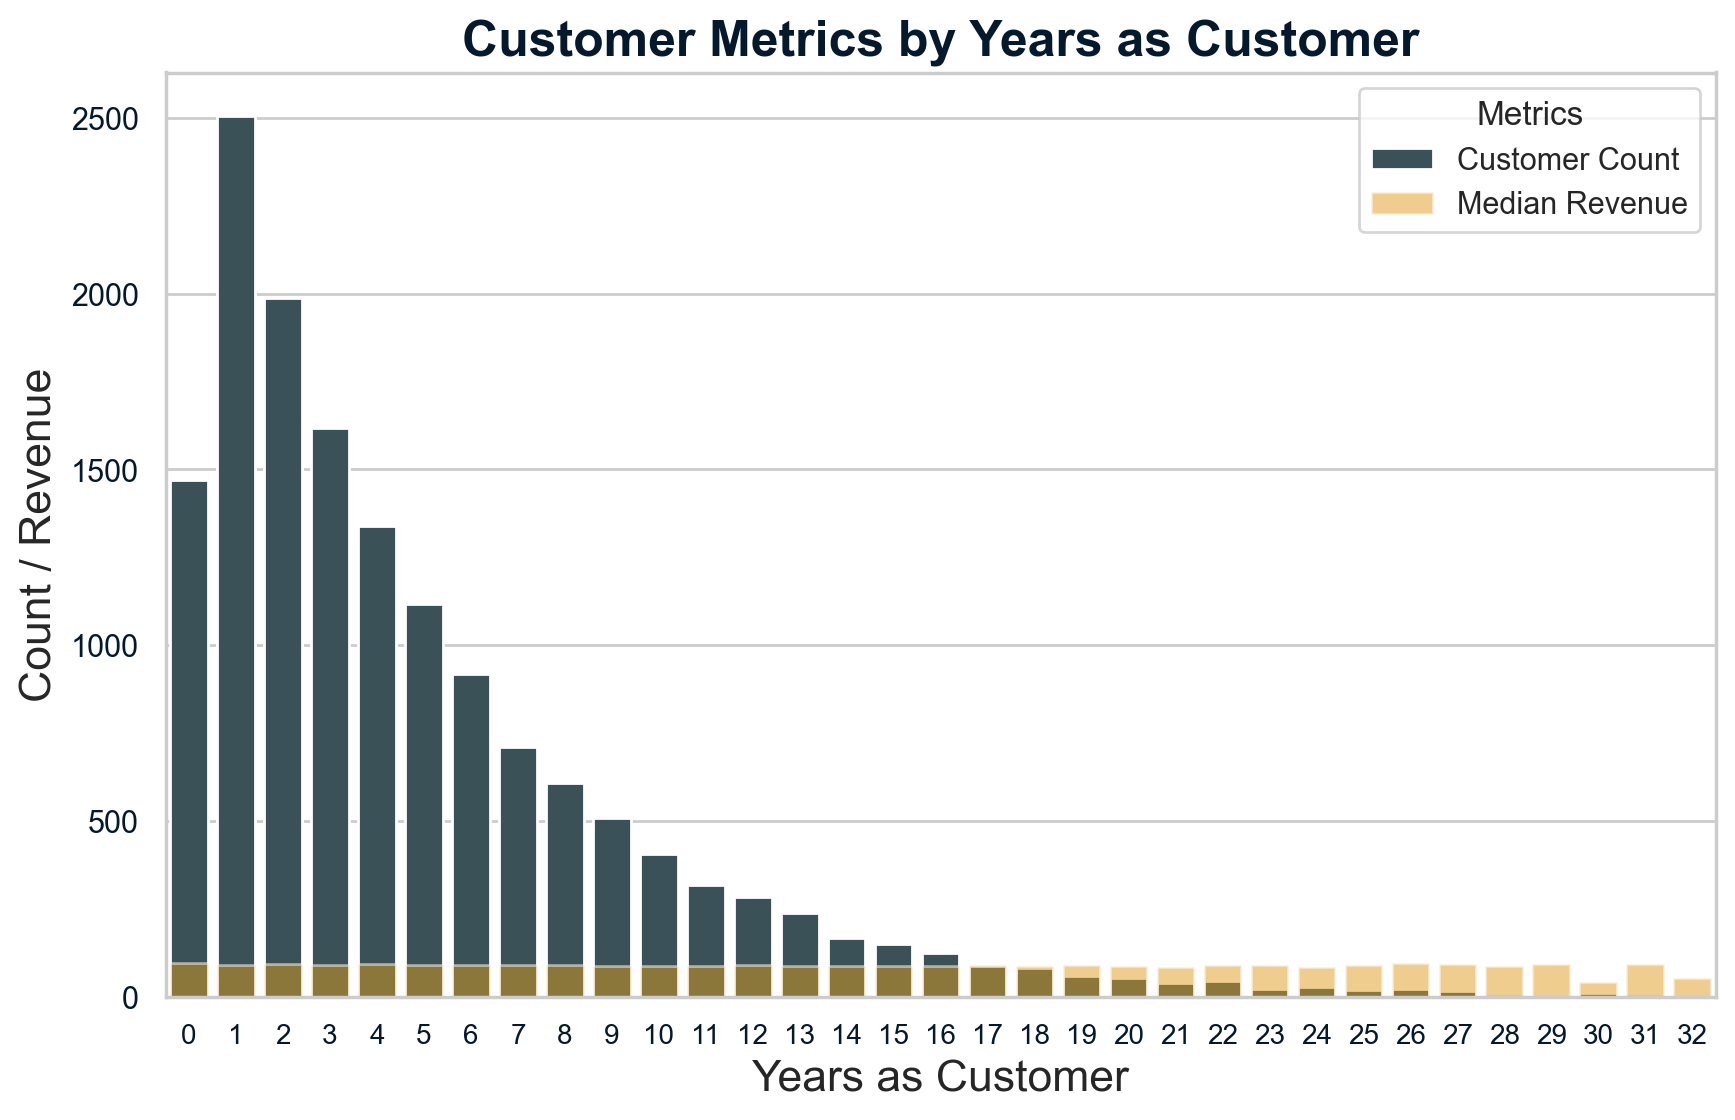

In [97]:
# Create a bar plot for customer counts
plt.figure(figsize=(10, 6))

# Bar plot for customer counts
sns.barplot(data=count_filtered, x='years_as_customer', y='customer_id', color='#35555C', label='Customer Count')

# Bar plot for median revenue (with alpha for transparency)
sns.barplot(data=median_rev_filtered, x='years_as_customer', y='revenue', alpha=0.5, color='orange', label='Median Revenue')

# Add legend
plt.legend(title='Metrics')

# Set labels and title
plt.xlabel('Years as Customer', fontsize = 16)
plt.ylabel('Count / Revenue', fontsize = 16)
plt.title('Customer Metrics by Years as Customer', fontsize = 18, weight = 'bold')
plt.xticks(fontsize = 10)
plt.show()

Company looses clients at a very fast pace after the first year as customers, however the revenue mantains constant, which means older customers (even though they are very few) pay a lot, there is an opportunity here to retain and increase the amount of older customers, this could increase revenue.

### Exploring number of visits to site

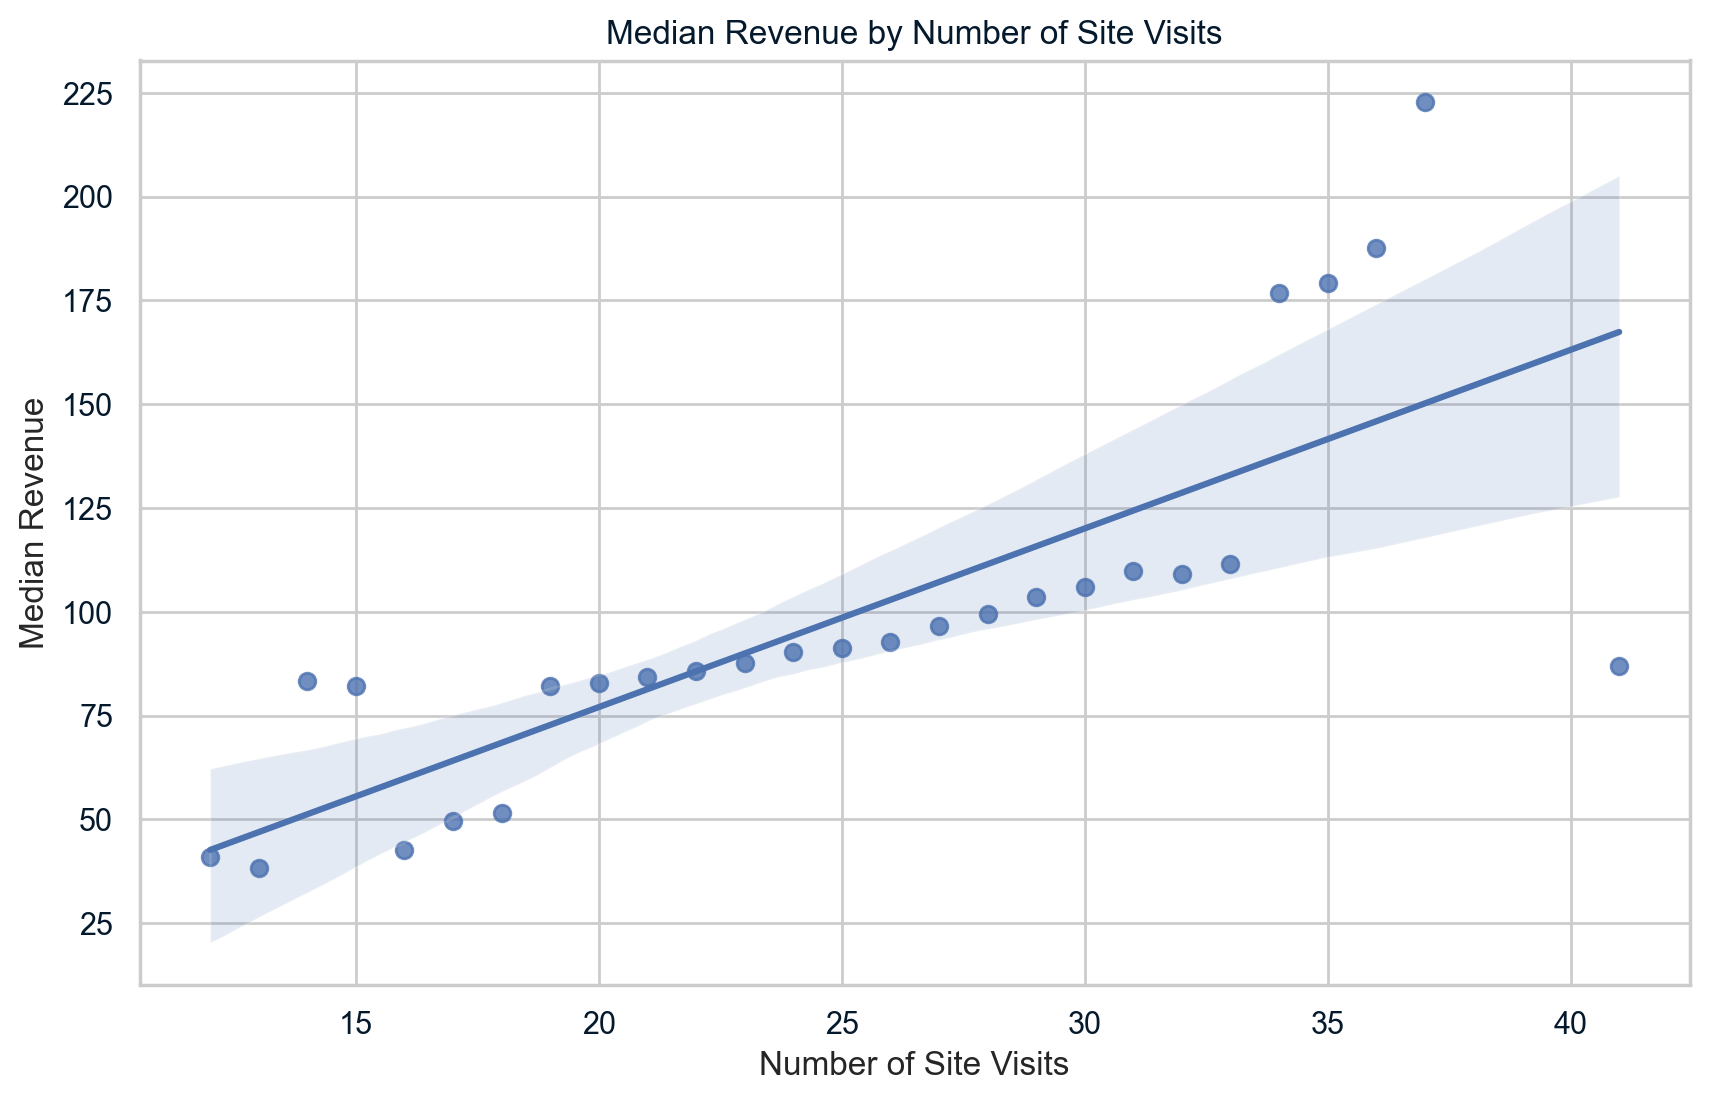

Spearman Correlation: 0.9090
P-Value: 0.0000


In [98]:
# Group by nb_site_visits and calculate median and total revenue
site_visits_revenue = df.groupby('nb_site_visits').agg({'revenue': ['median', 'sum'], 'customer_id': 'nunique'}).reset_index()
site_visits_revenue.columns = ['nb_site_visits', 'median_revenue', 'total_revenue', 'customer_count']

# Plot revenue against nb_site_visits
plt.figure(figsize=(10, 6))
sns.regplot(x='nb_site_visits', y='median_revenue', data=site_visits_revenue)
plt.title("Median Revenue by Number of Site Visits")
plt.xlabel("Number of Site Visits")
plt.ylabel("Median Revenue")
plt.show()

# Calculate Spearman correlation between nb_site_visits and median_revenue
correlation, p_value = stats.spearmanr(site_visits_revenue['nb_site_visits'], site_visits_revenue['median_revenue'])

# Print the results
print(f"Spearman Correlation: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

Median revenue tends to increase as the number of site visits increases. <br>
Strong correlation <br>
Statistically significant. <br>
There is a significant correlation between number of site visits and median revenue.

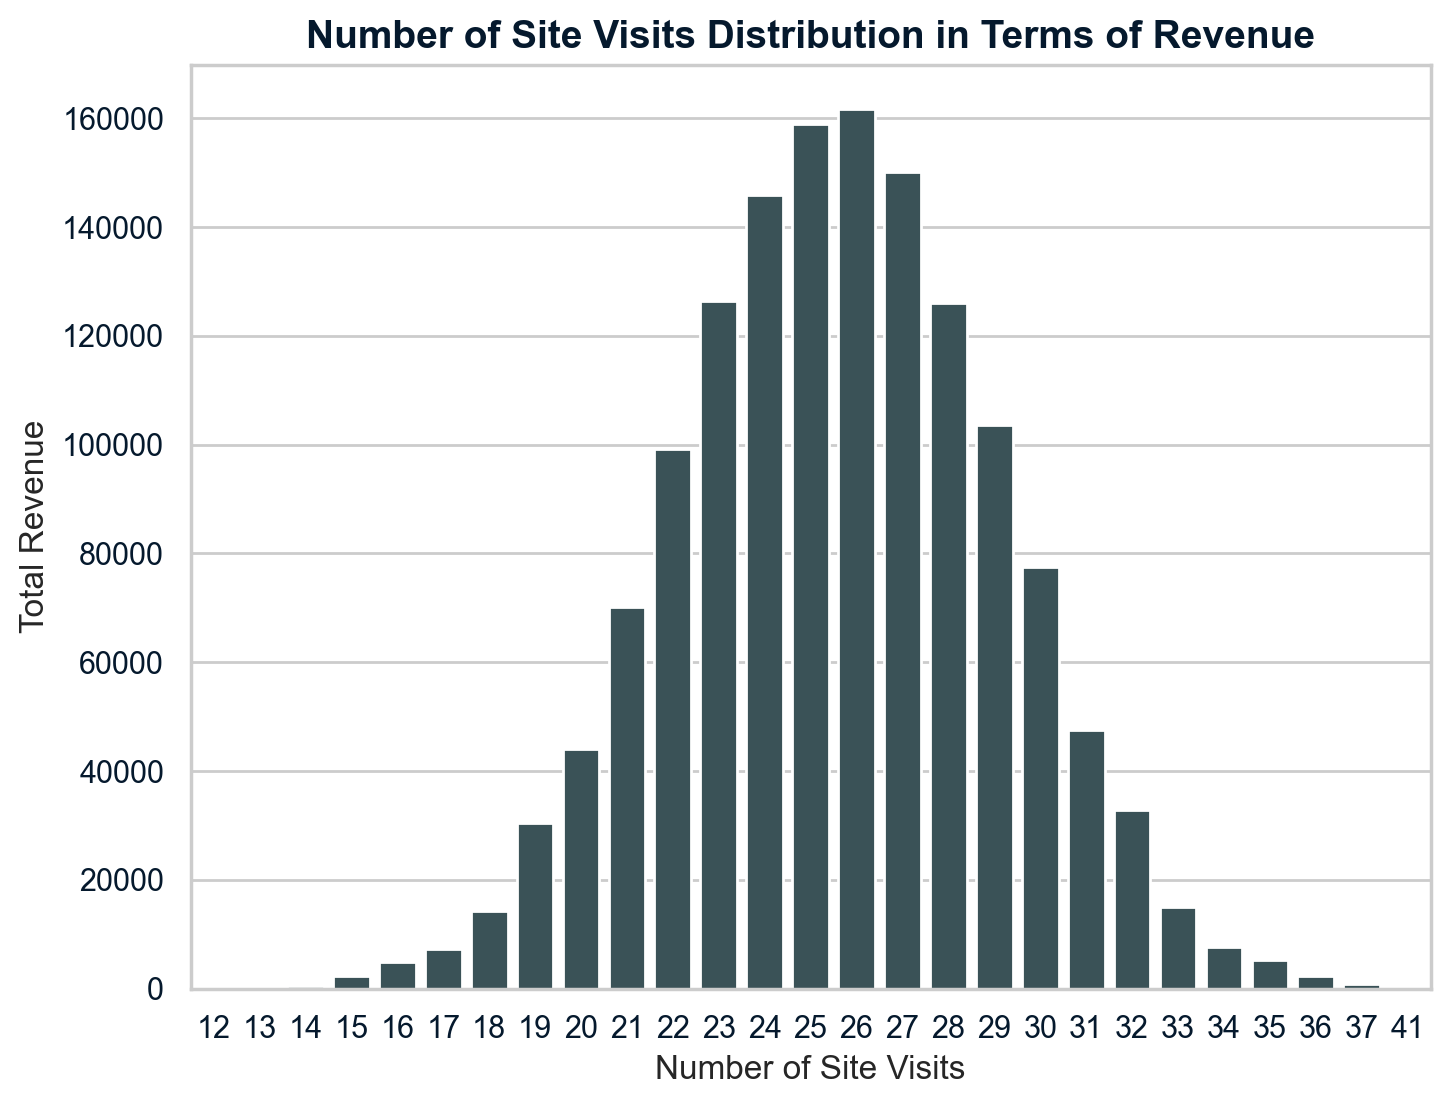

In [99]:
plt.figure(figsize=(8,6))
sns.barplot(data = site_visits_revenue, x = 'nb_site_visits', y = 'total_revenue', color = '#35555C')
plt.title('Number of Site Visits Distribution in Terms of Revenue', fontsize = 14, weight = 'bold')
plt.xlabel('Number of Site Visits', fontsize = 12)
plt.xticks(fontsize = 11)
plt.ylabel('Total Revenue', fontsize = 12)
plt.show()

Total revenue follows, what appears to be, a normal distribution, which means that the majority of total_revenue concentrates on people that have visited the site between 21 and 31 times, there is an opportunity for improvement to increase first-time visitor revenue.

### Churn analysis

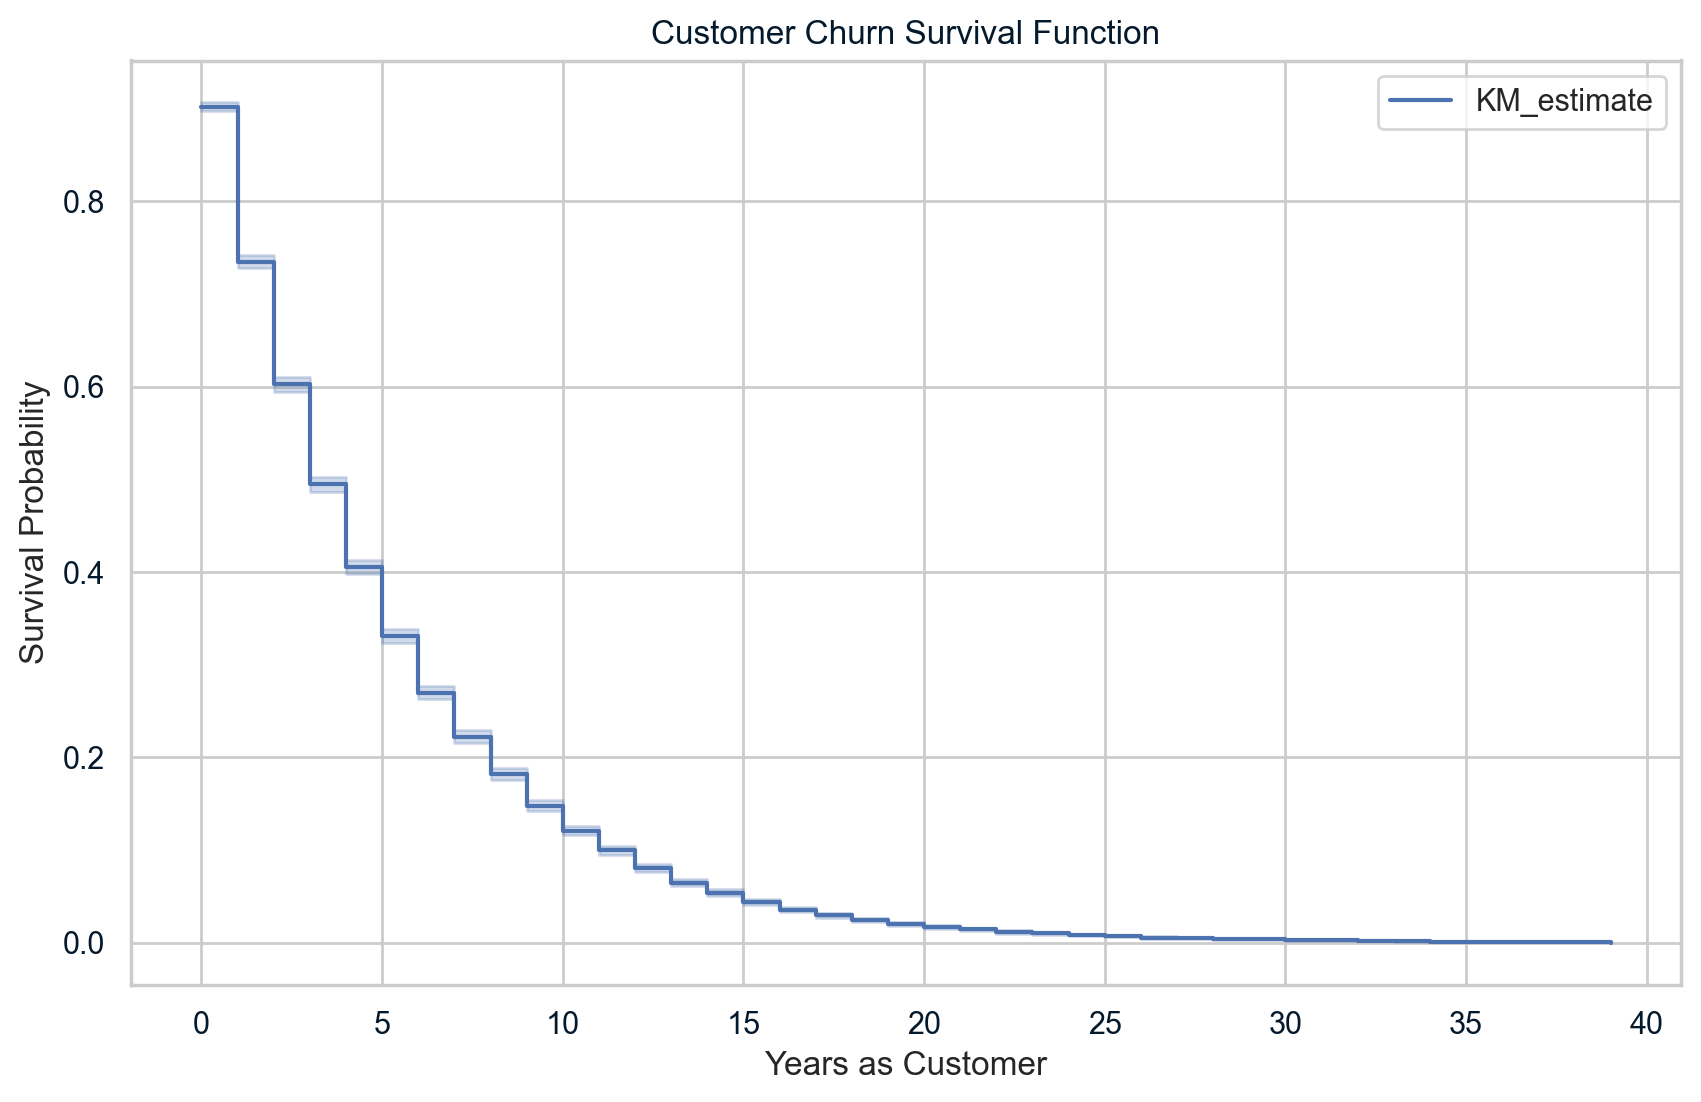

In [100]:
import lifelines
from lifelines import KaplanMeierFitter

# Assume churn when customer is no longer in the dataset after a certain year (simplification)
# Add a churn indicator (1 if customer churned, 0 if still active)
df['churn'] = df['years_as_customer'].apply(lambda x: 1 if x >= 0 else 0)

# Kaplan-Meier Fitter for churn over years
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

kmf.fit(df['years_as_customer'], df['churn'])
kmf.plot_survival_function()

plt.title('Customer Churn Survival Function')
plt.xlabel('Years as Customer')
plt.ylabel('Survival Probability')
plt.show()


# Conclusion

**Focus on Email + Call:** This method should be prioritized for high-value customers or those who require personalized interaction. <br>
**Introduce Offers for First-Time Buyers:** To boost engagement and buy rates for low-visit customers, offer discounts or targeted promotions. <br>
**Launch a Loyalty Program:** To combat customer churn after the first year, introduce a loyalty program and personalized follow-ups to retain customers. <br>
**Monitor ARPC:** Use the Average Revenue Per Customer metric to continuously evaluate sales methods and adjust strategies as needed. <br>
By addressing these insights, the business can streamline its sales approach, optimize resource use, and boost long-term customer engagement.
